# Explainability of the music information retrieval

## Init application with configuration file

The `configuration.yml` file serves as a central place to manage settings for the music information retrieval application. It specifies paths for saving augmented audio outputs, data sources, and model tag result outputs. Additionally, it defines tempo factors for audio manipulation and a range of musical keys for analysis. This configuration ensures that the application operates with consistent parameters and file locations, facilitating easier data management and processing.


In [1]:
from xai_music import XaiMusic

xai_music = XaiMusic(config_file='./configuration.yml')

## Synthesis audio banks for model analysis

The function `synthesis_audiobank` is used to generate a collection of audio samples for model analysis. It takes an argument `n_sample_genre` which specifies the number of samples per genre to be synthesized. This process is crucial for creating a diverse dataset that the model can learn from, ensuring a comprehensive analysis across different musical genres.


In [2]:
xai_music.synthesis_audiobank(n_sample_genre=2)

Processing audio files: 100%|██████████| 20/20 [01:48<00:00,  5.43s/it]


## Load the model you want to analyze

In this step, we are preparing to analyze the music model by loading it into our application. This involves using TensorFlow to load the pre-trained model from a specified path. The model we are loading is 'MSD_musicnn.h5', which is a part of the musicnn_keras library. This model is designed to analyze music and extract various tags related to the music's characteristics. By loading this model, we enable our application to perform deep analysis on music files and understand their underlying patterns and features.


In [3]:
import tensorflow as tf
from musicnn_keras.tagger import top_tags


musicnn = tf.keras.models.load_model(
    './musicnn_keras/keras_checkpoints/MSD_musicnn.h5')


2024-04-14 22:16:59.416114: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-14 22:16:59.417450: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-14 22:16:59.440125: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-14 22:16:59.441079: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-14 22:16:59.940709: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

## Analysis of the music model

The function `tag_analysis` is used to perform the analysis of the music model. It takes an argument `model` which specifies the model to be analyzed. This process is crucial for understanding the music model's performance and identifying the most common tags.

xai_music.tag_analysis(model=musicnn)

In each music, there are 4 heatmap plots in general. The image name is default.
- `tag_analysis_by_key_sum`: The heatmap shows how does model recognize well in different `keys`, no matter how tempo changes.
- `tag_analysis_by_tempo_sum`:  The heatmap shows how does model recognize well in different `tempo`, no matter how key changes.
- `tag_analysis_by_key`: The heatmap shows in different `key` change, how does `tempo` influence the model.
- `tag_analysis_by_tempo`: The heatmap shows in different `tempo` change, how does `tempo` influence the model.


Analyzing Music Tags by tempo change:  50%|█████     | 10/20 [00:08<00:07,  1.26it/s]/home/dell-shou/GitHub/xai_music/xai_music/audiobank.py:316: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()
Analyzing Music Tags by key change: 100%|██████████| 20/20 [00:16<00:00,  1.20it/s]


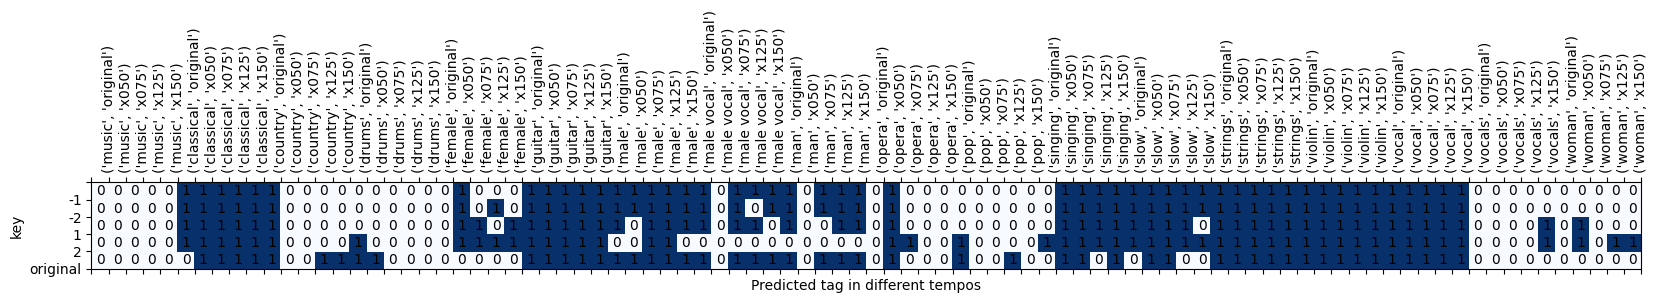

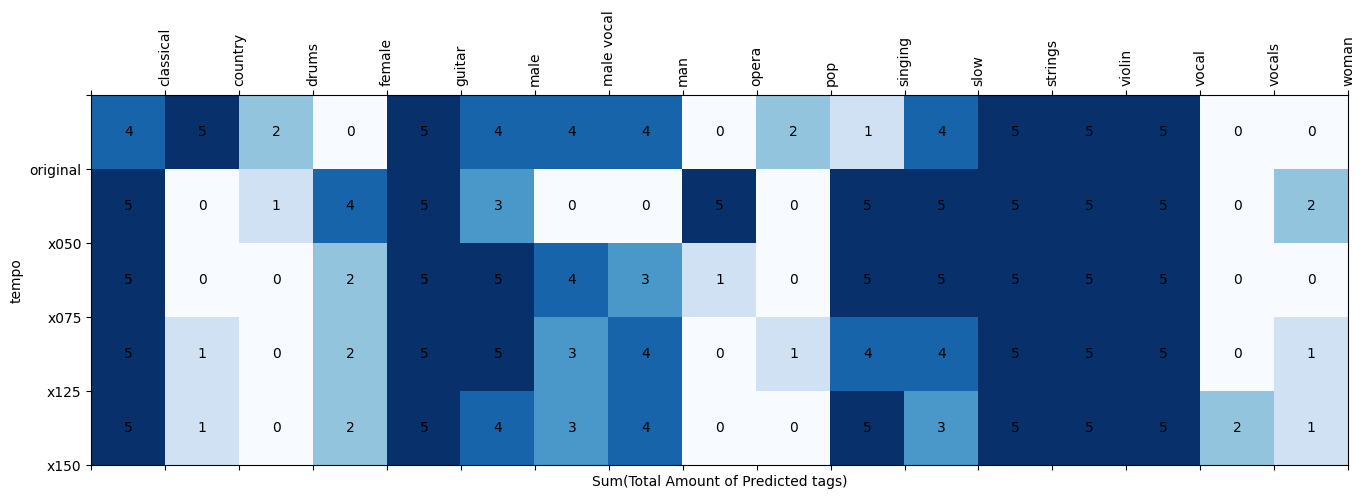

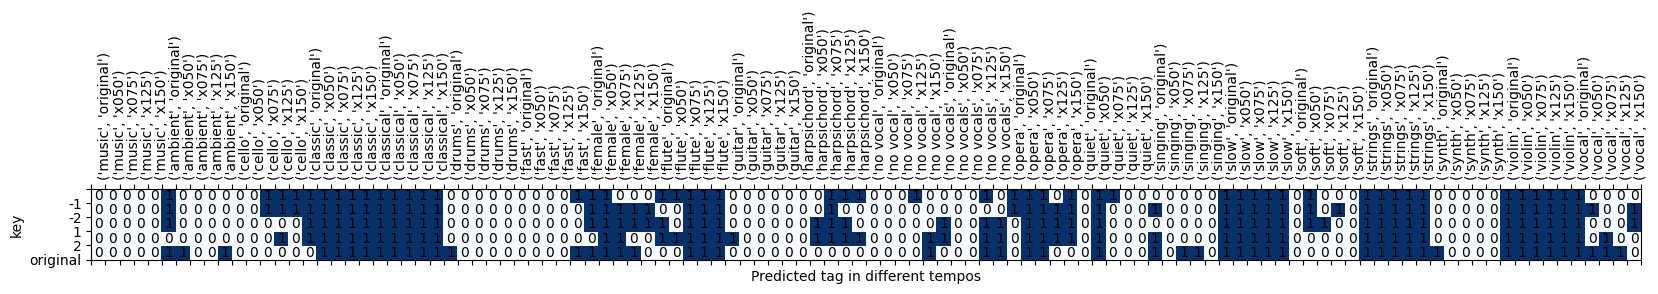

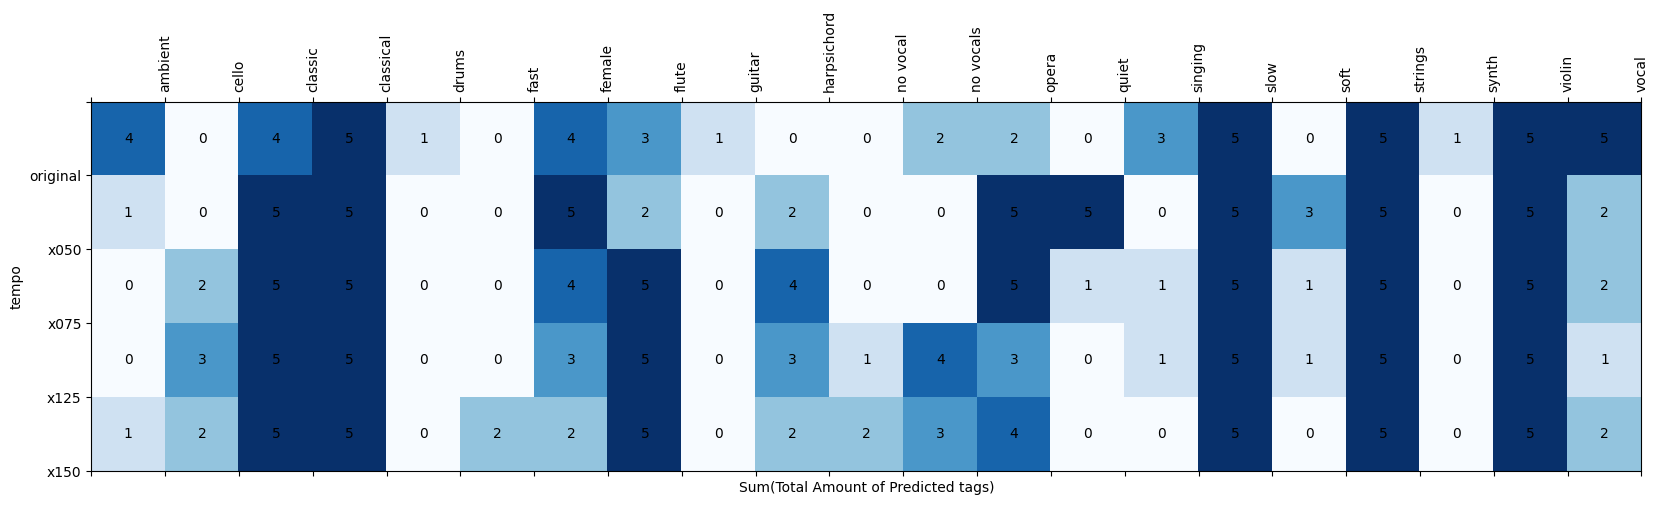

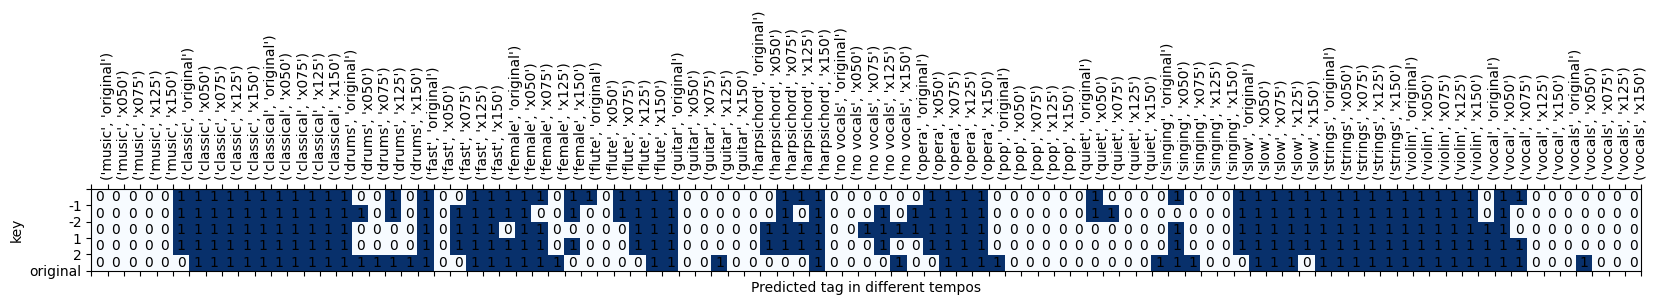

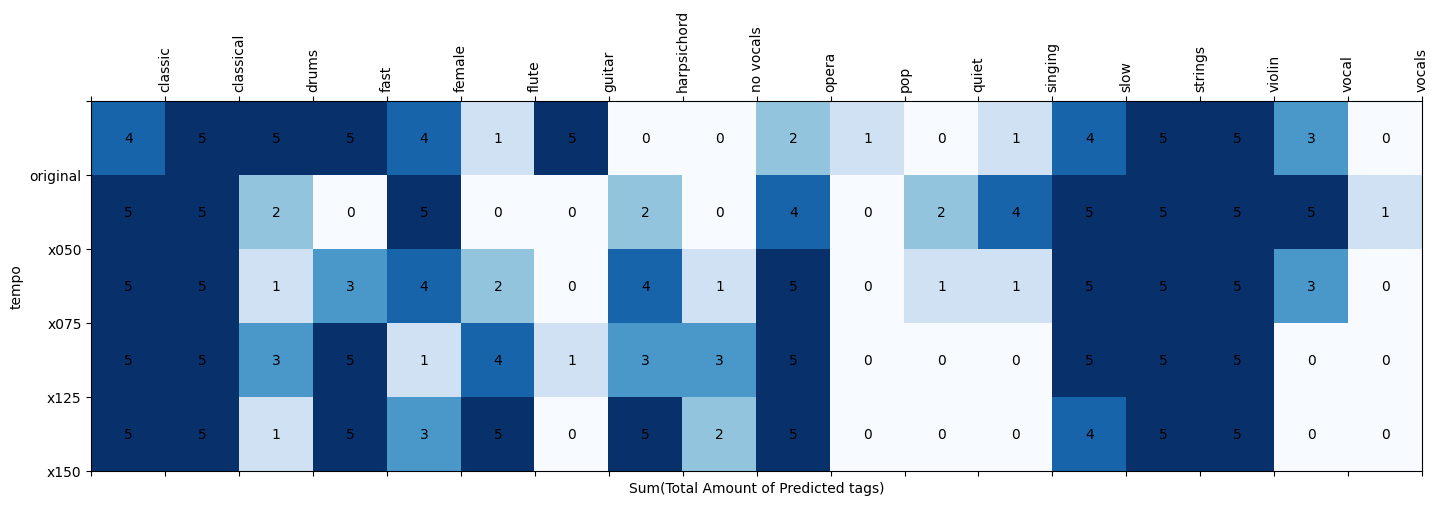

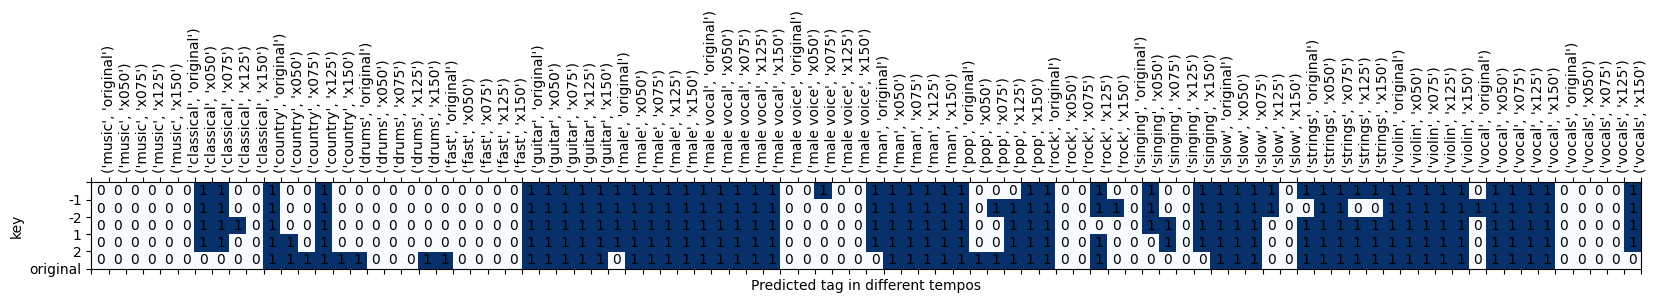

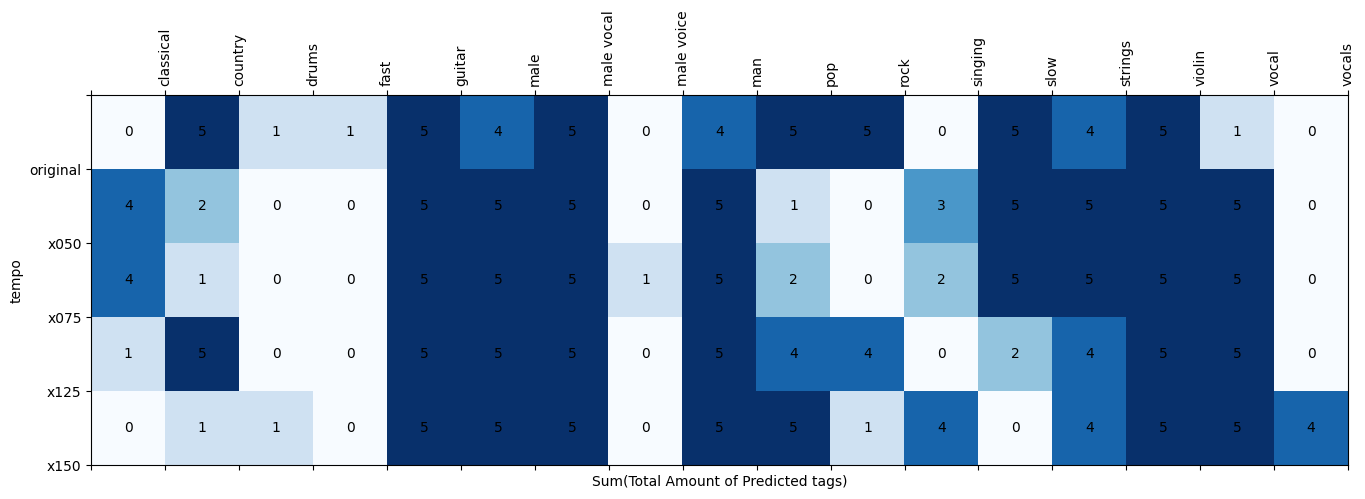

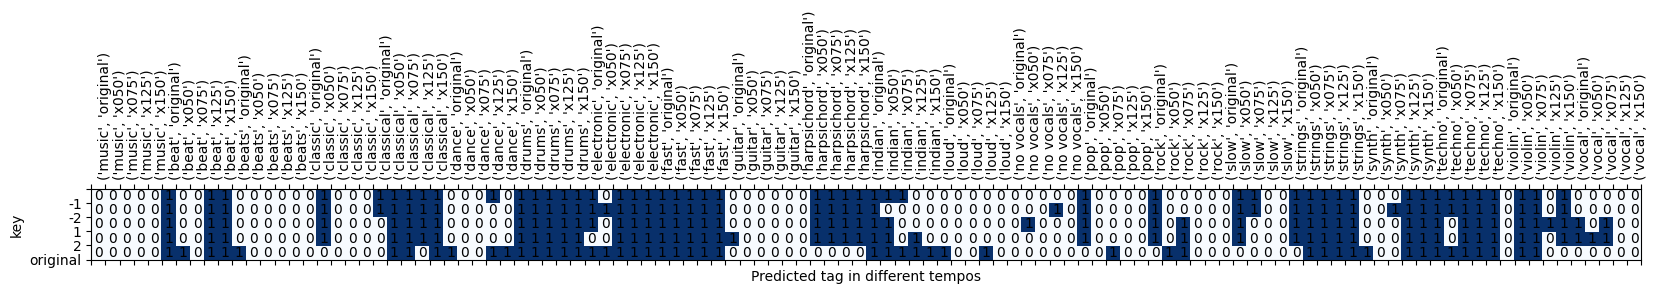

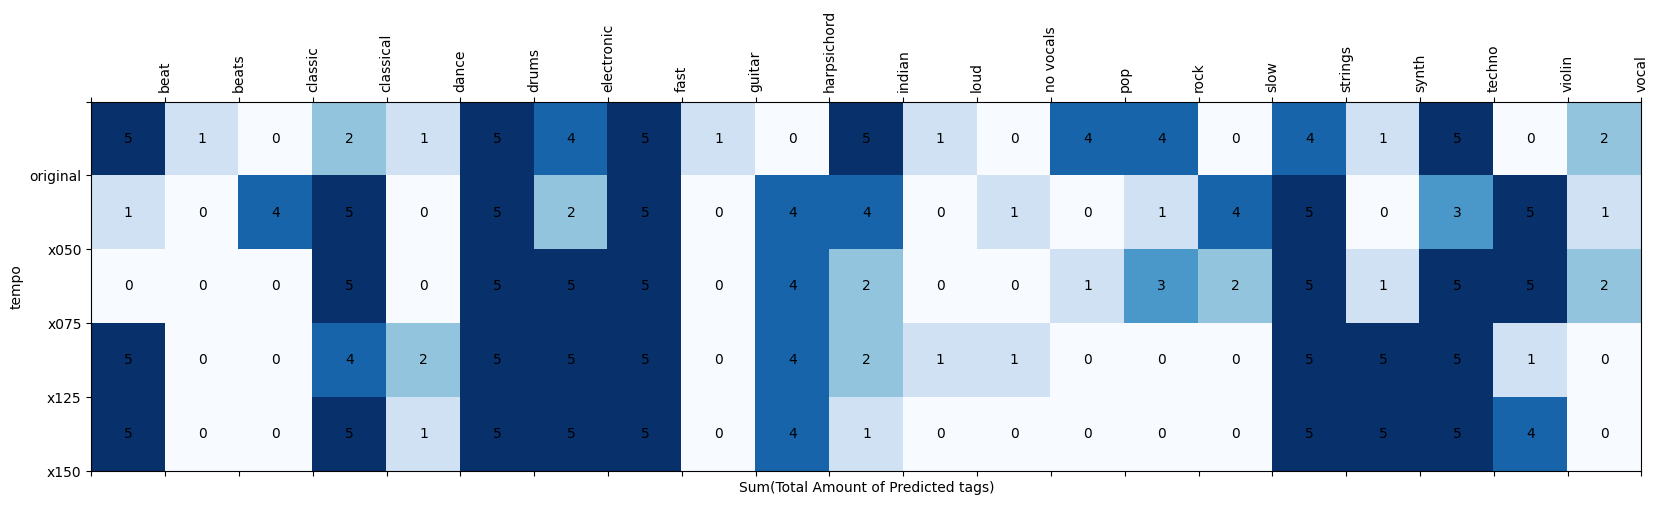

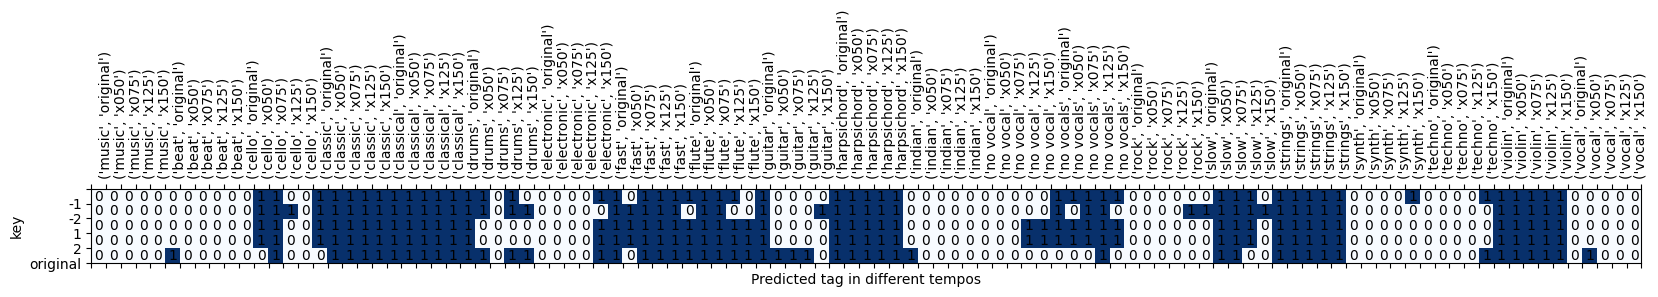

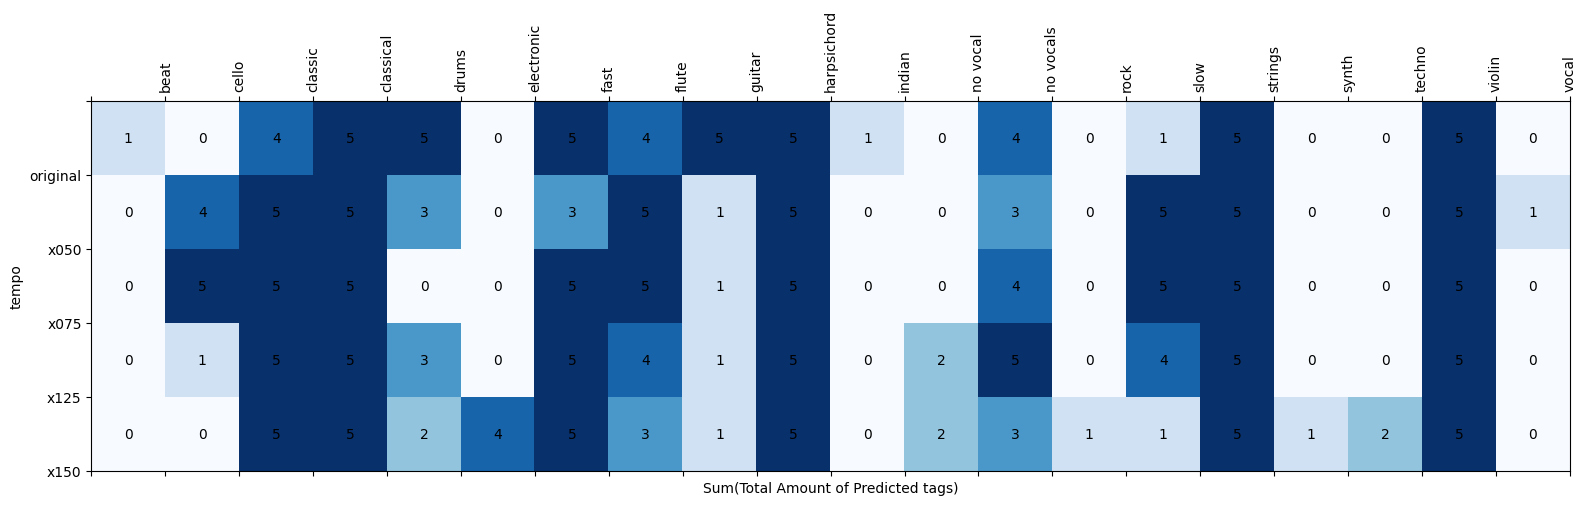

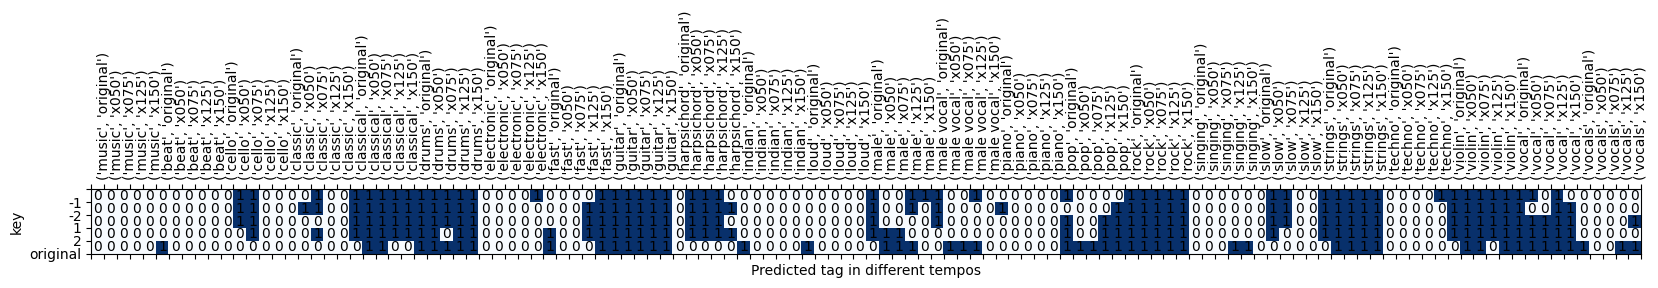

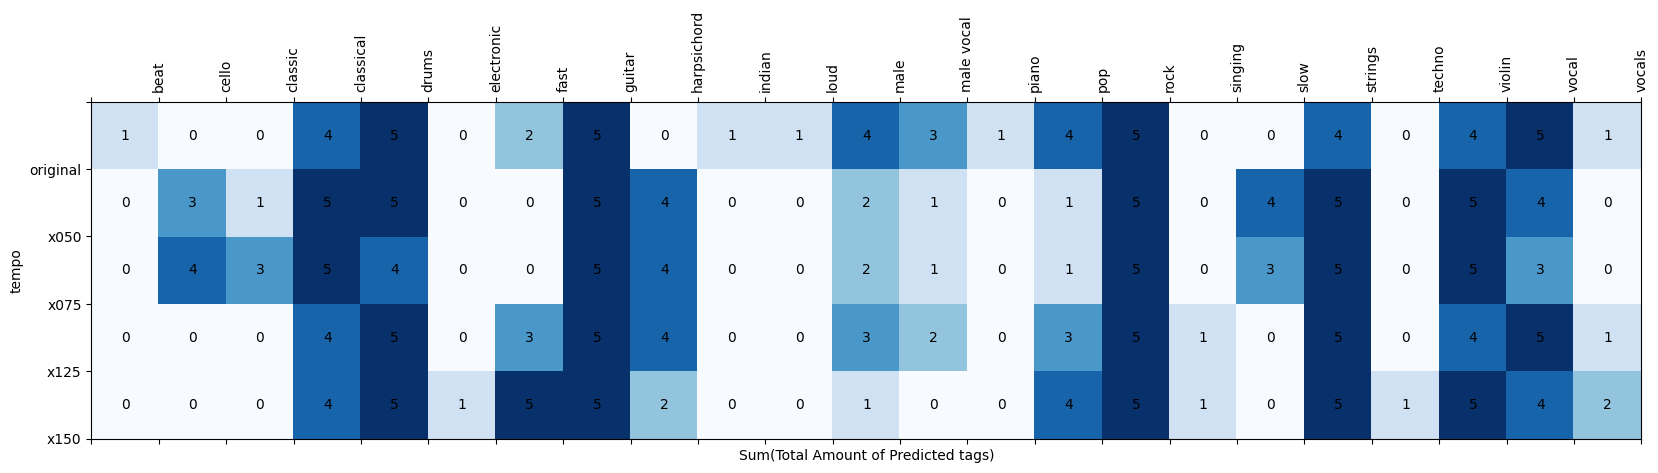

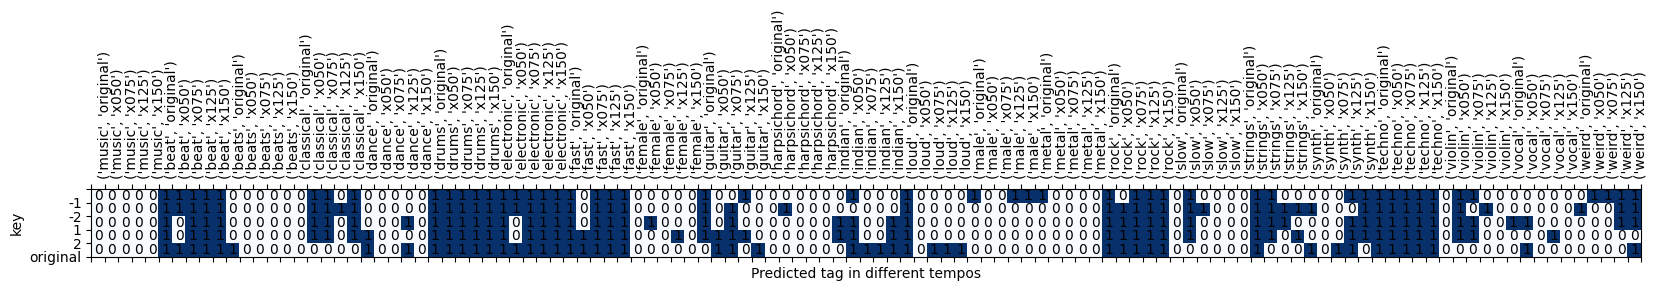

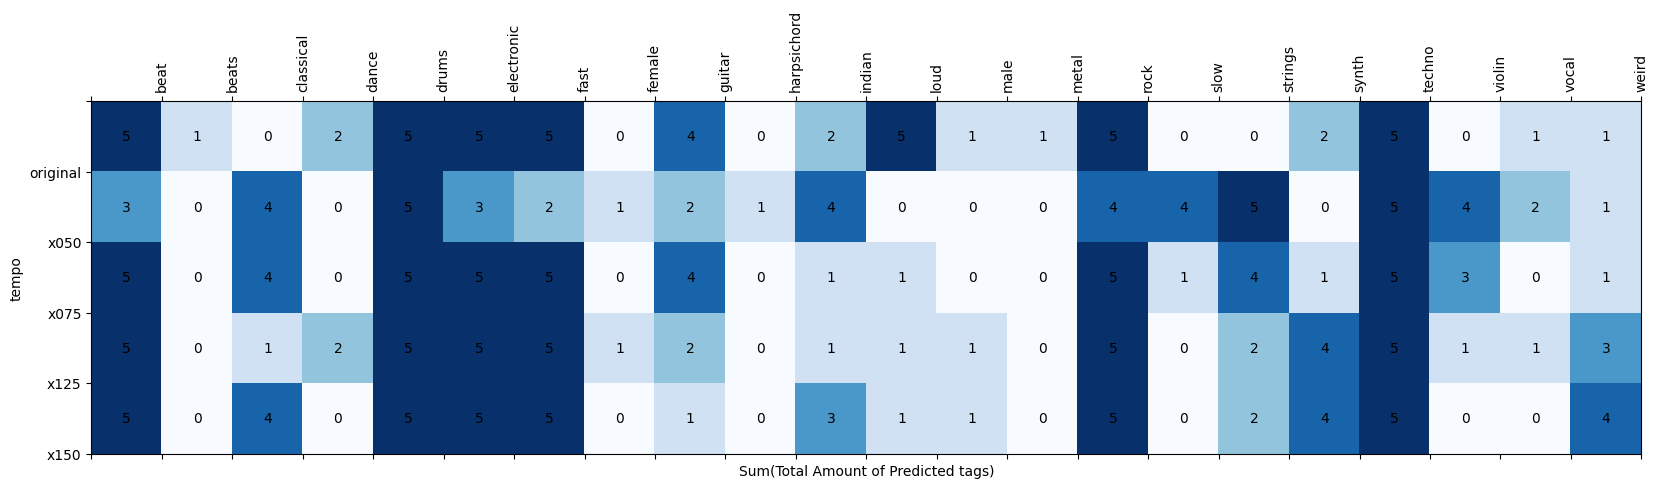

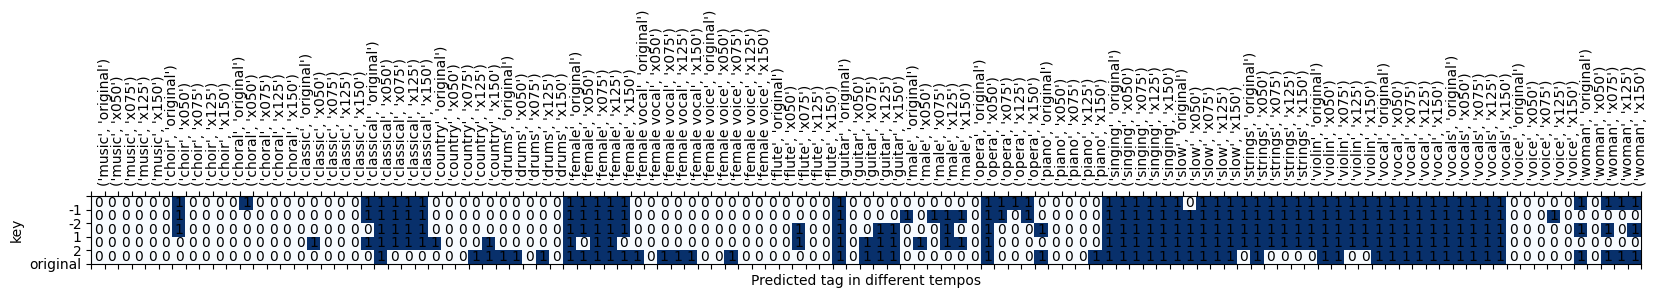

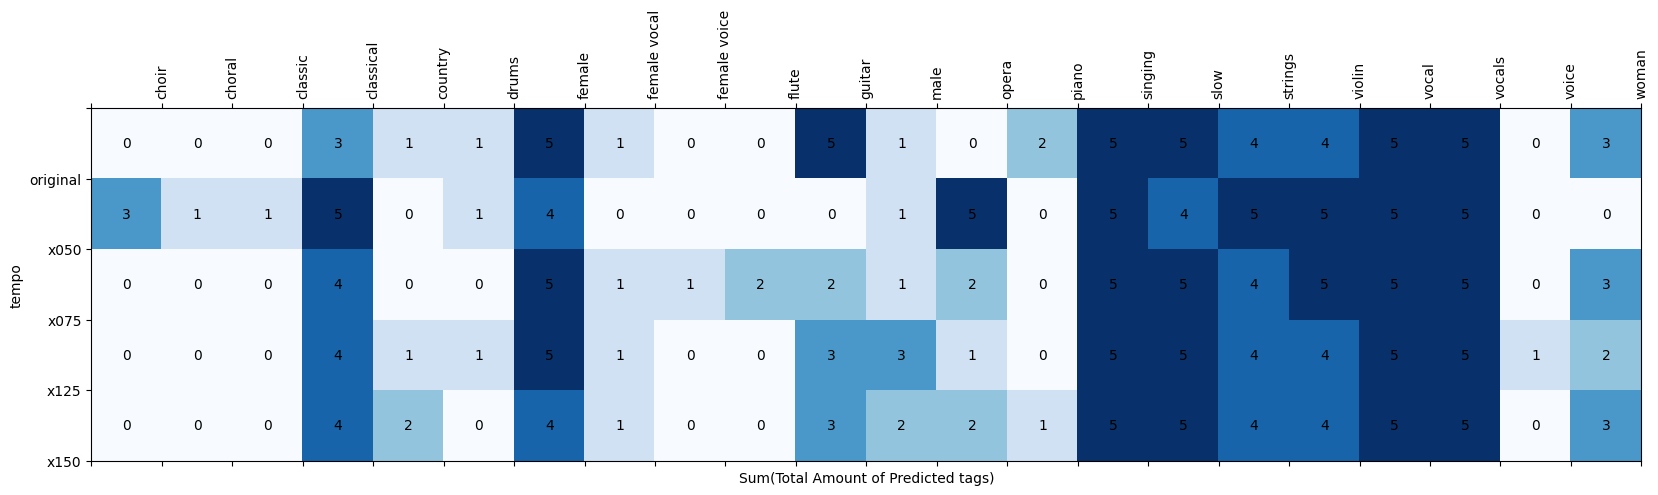

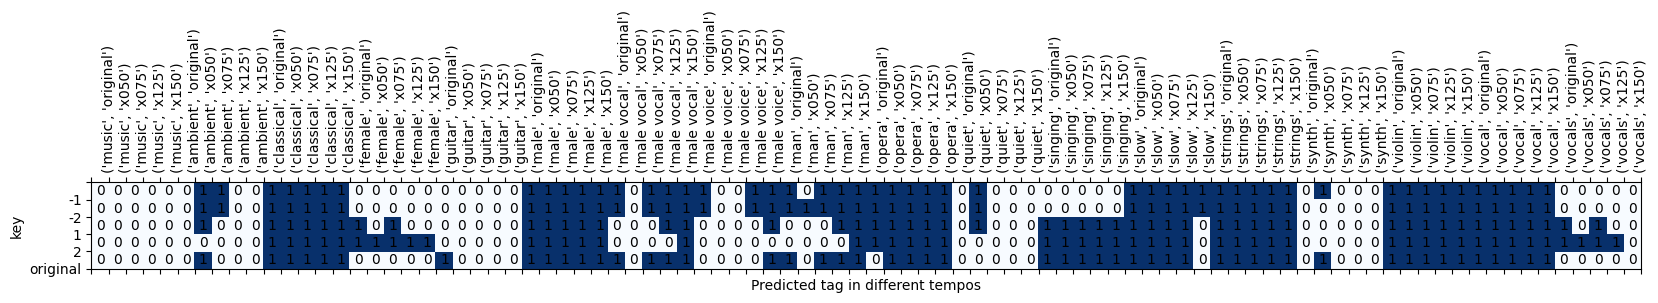

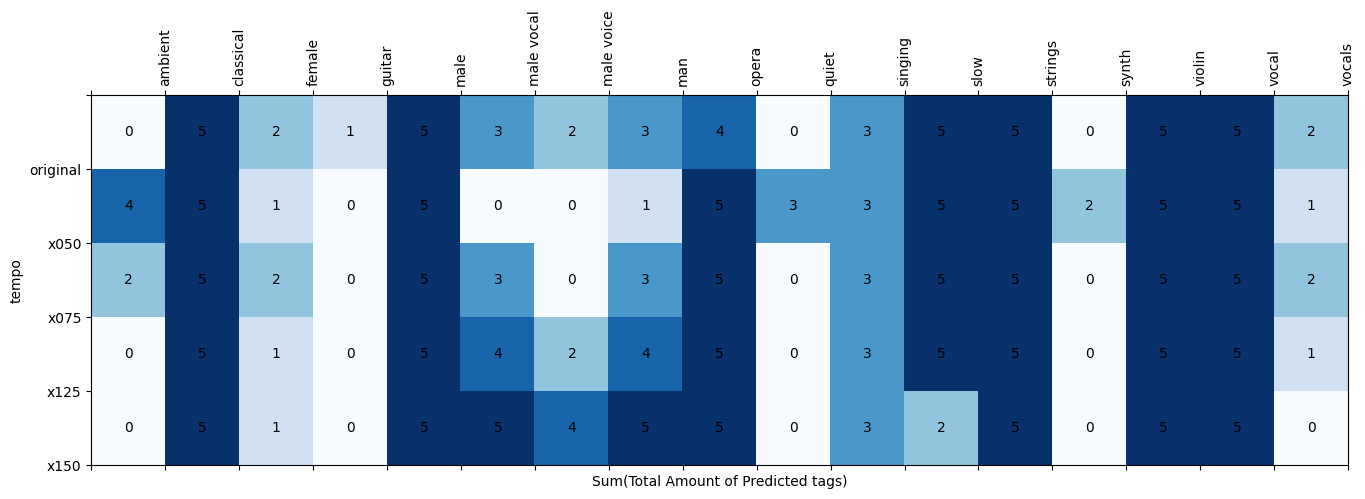

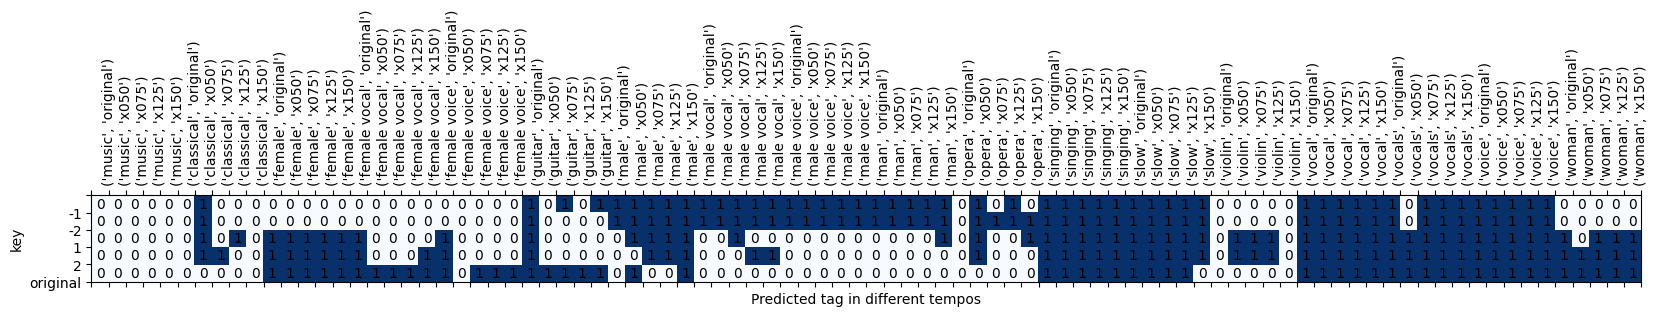

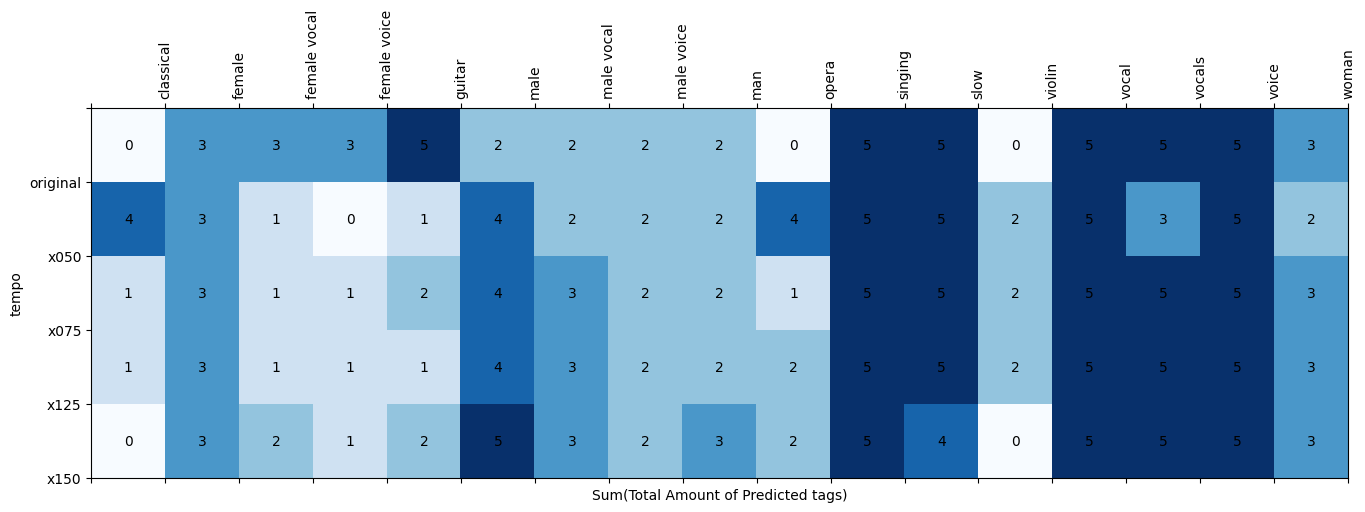

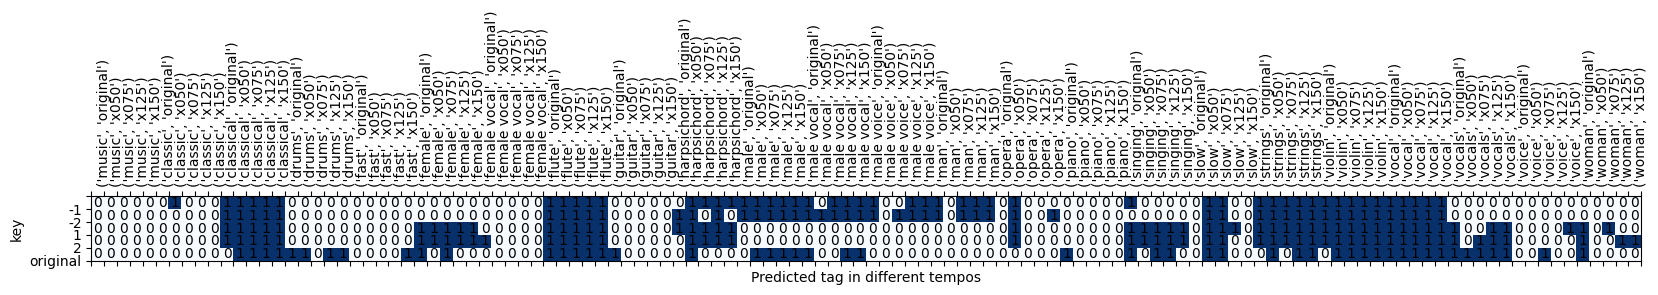

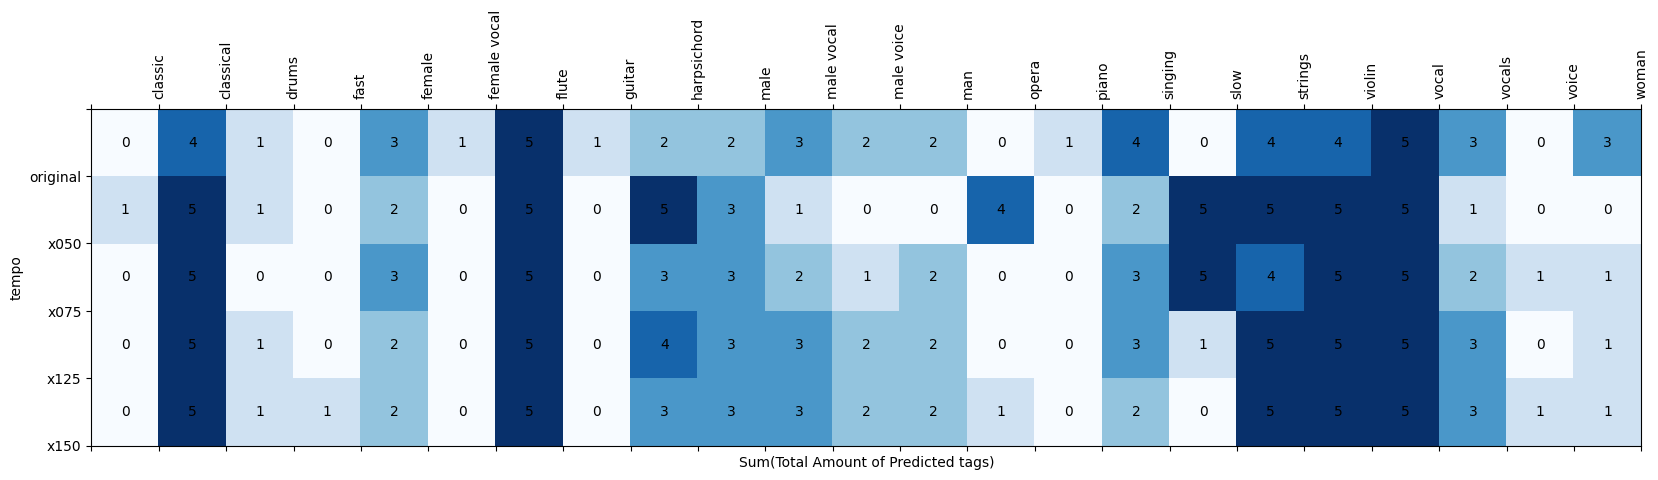

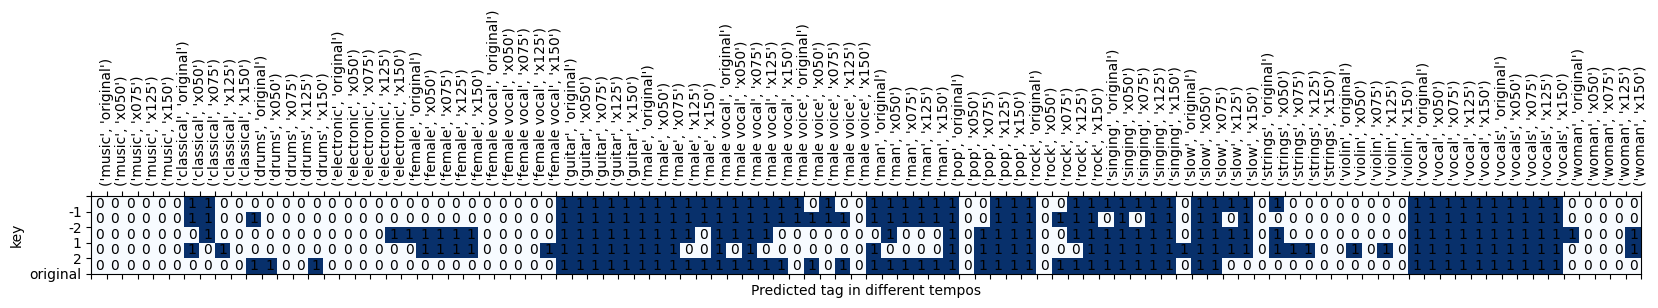

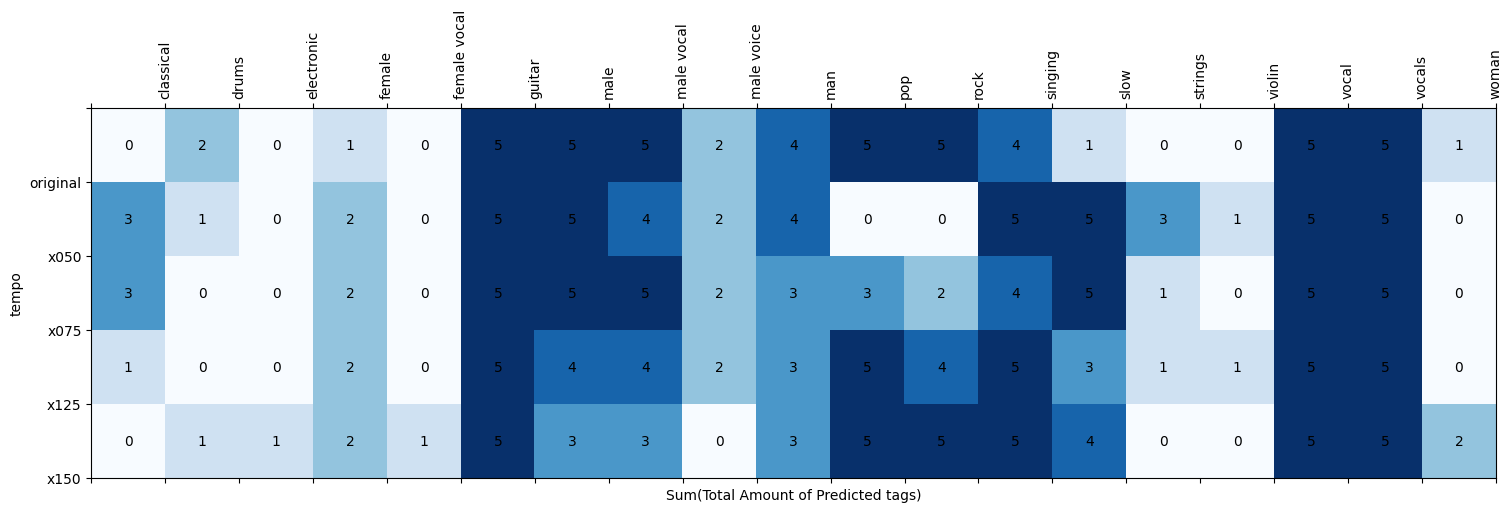

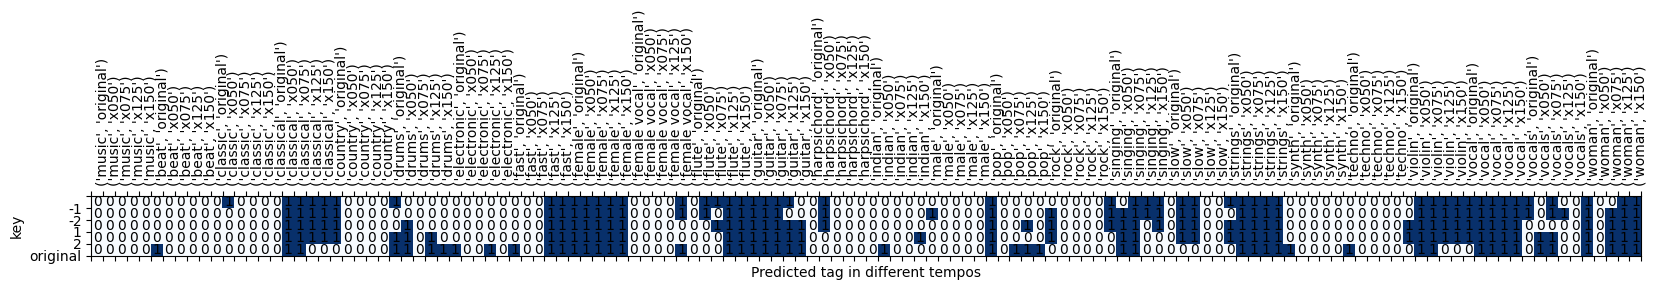

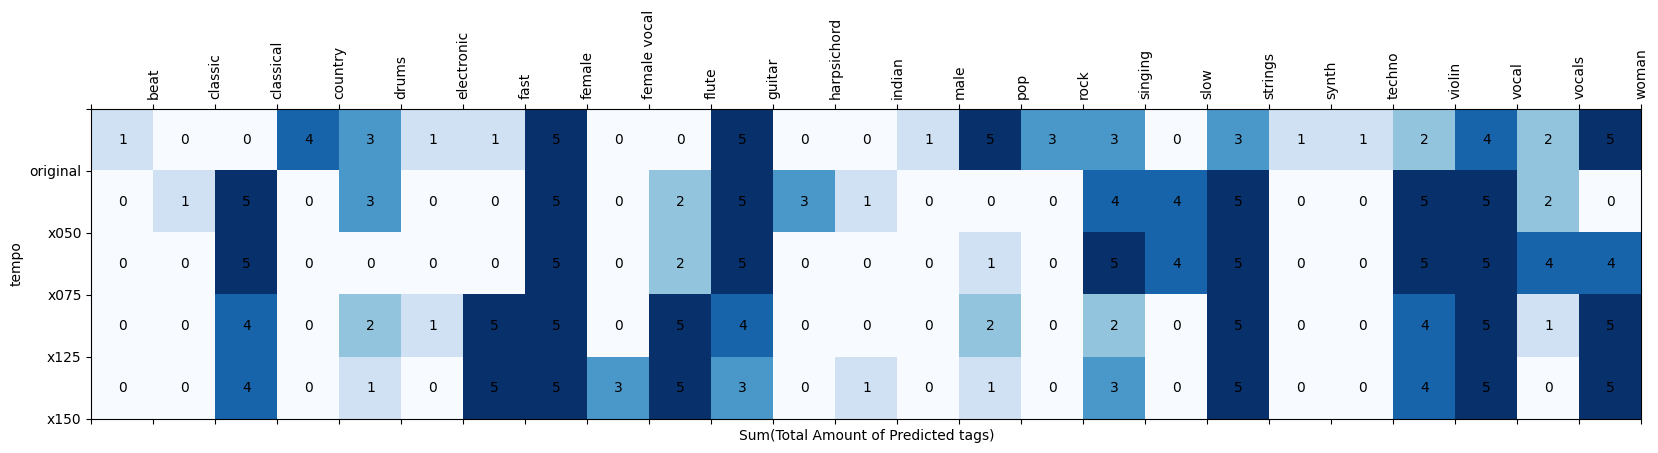

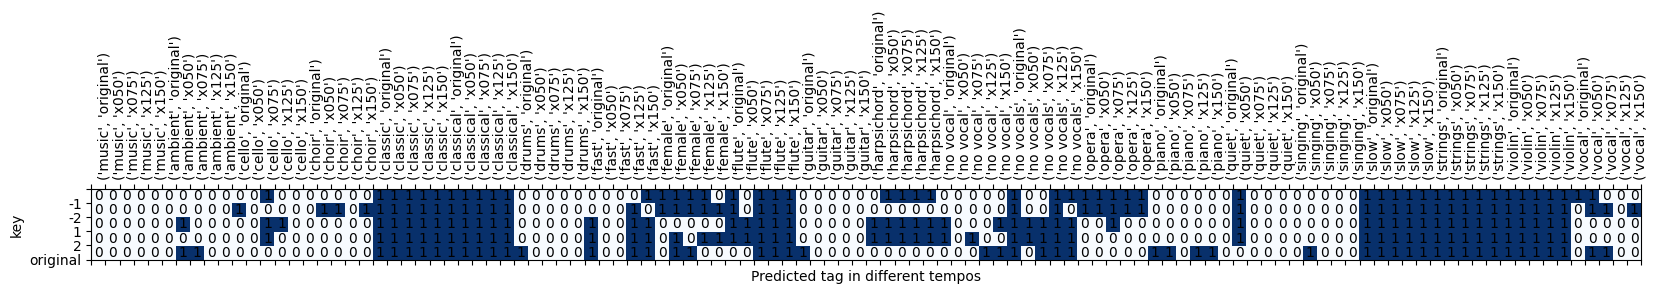

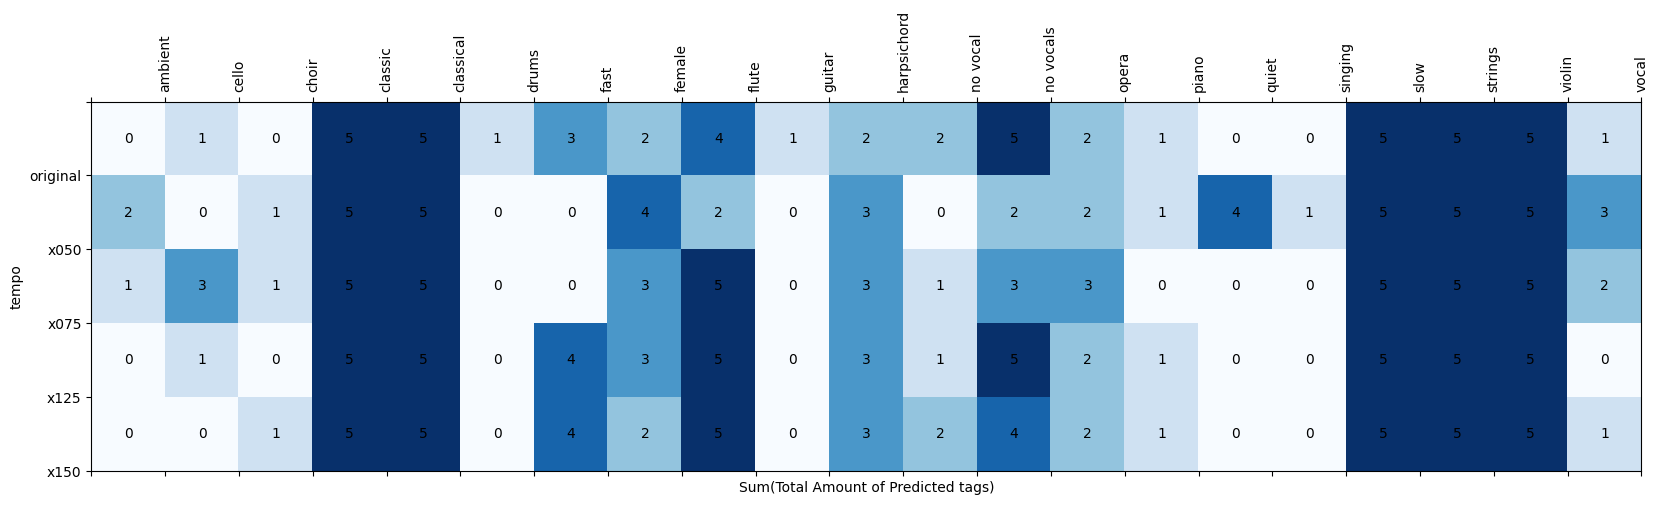

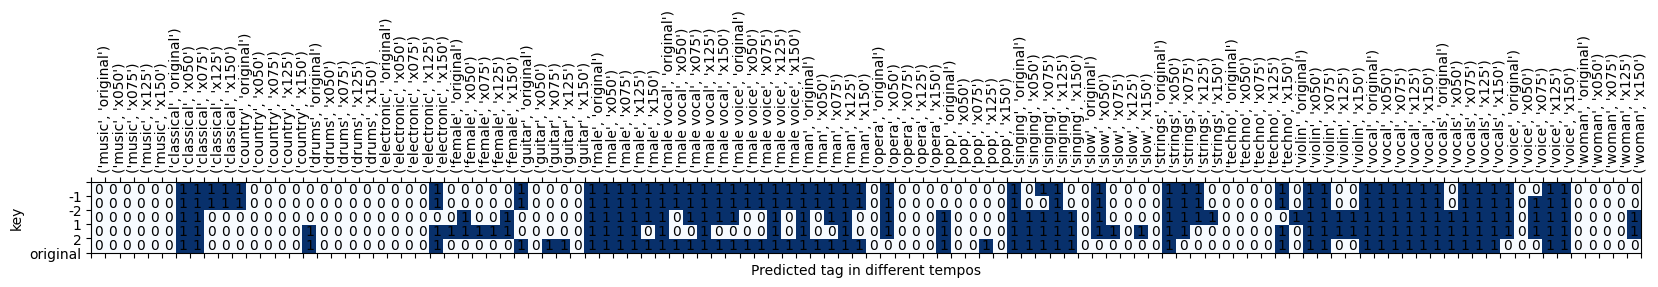

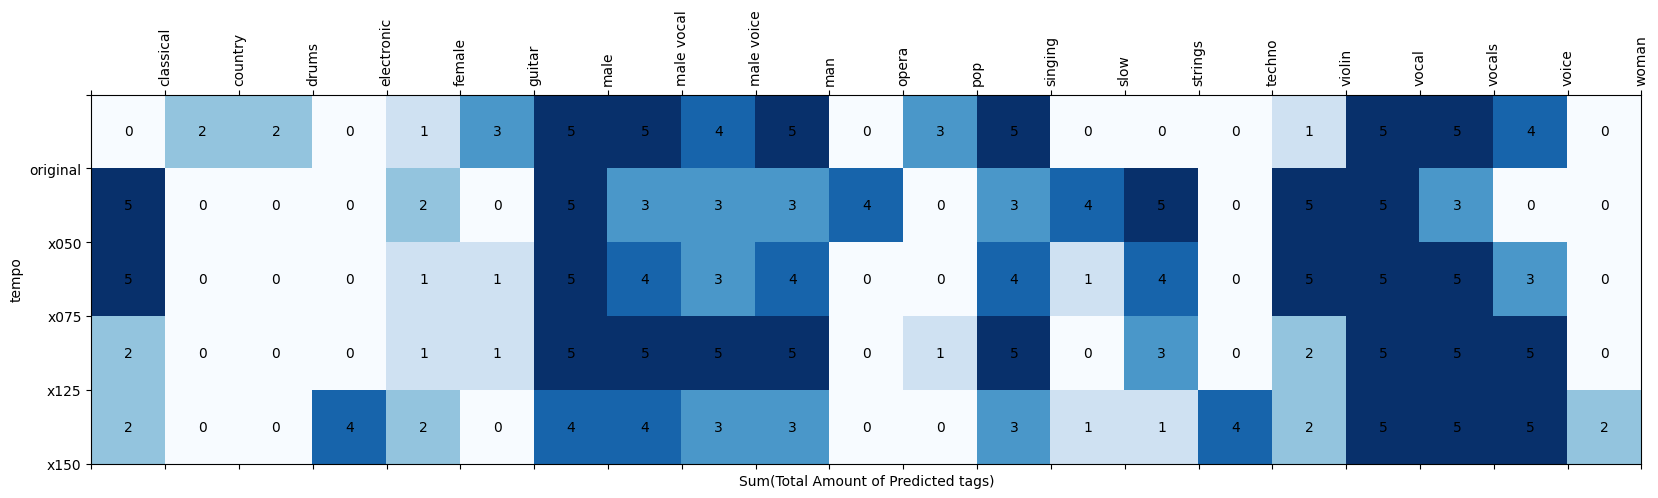

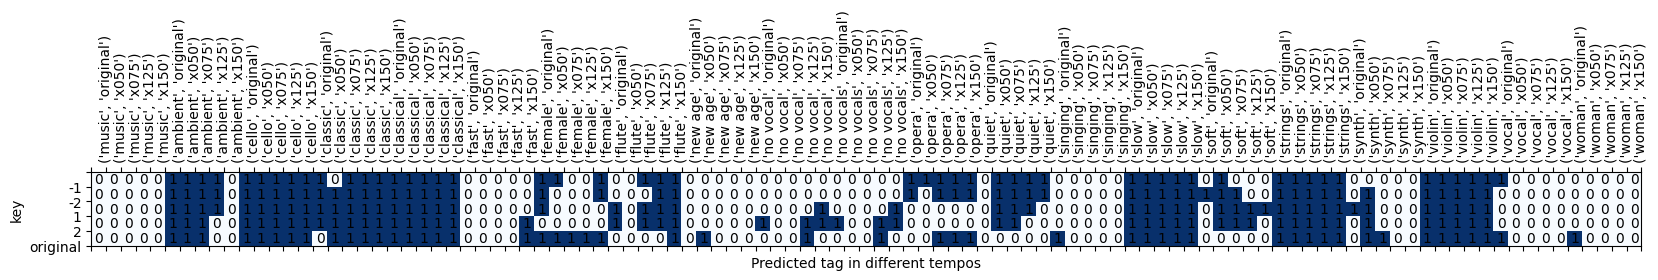

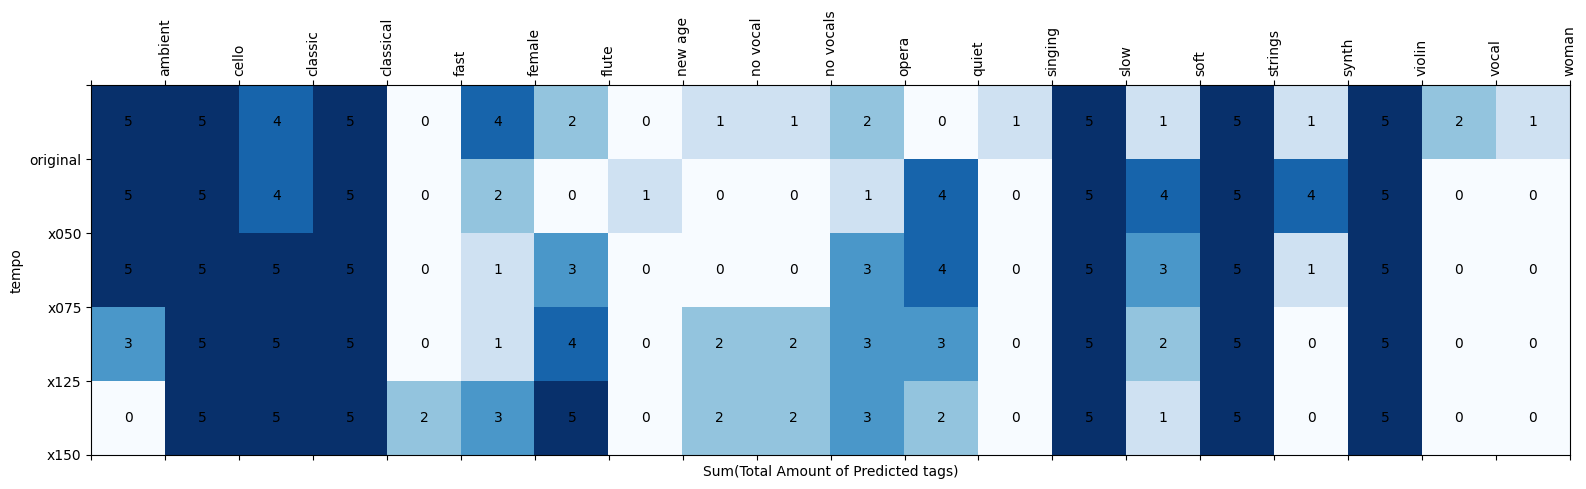

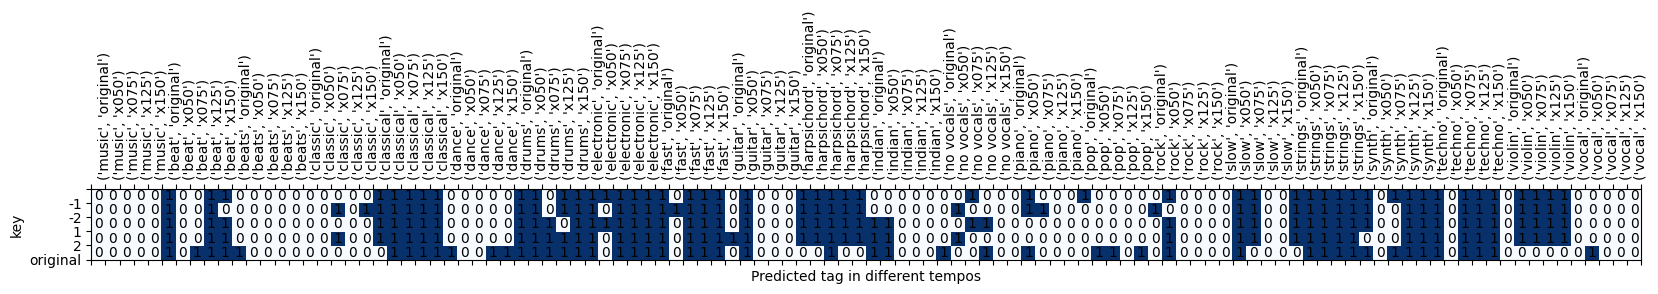

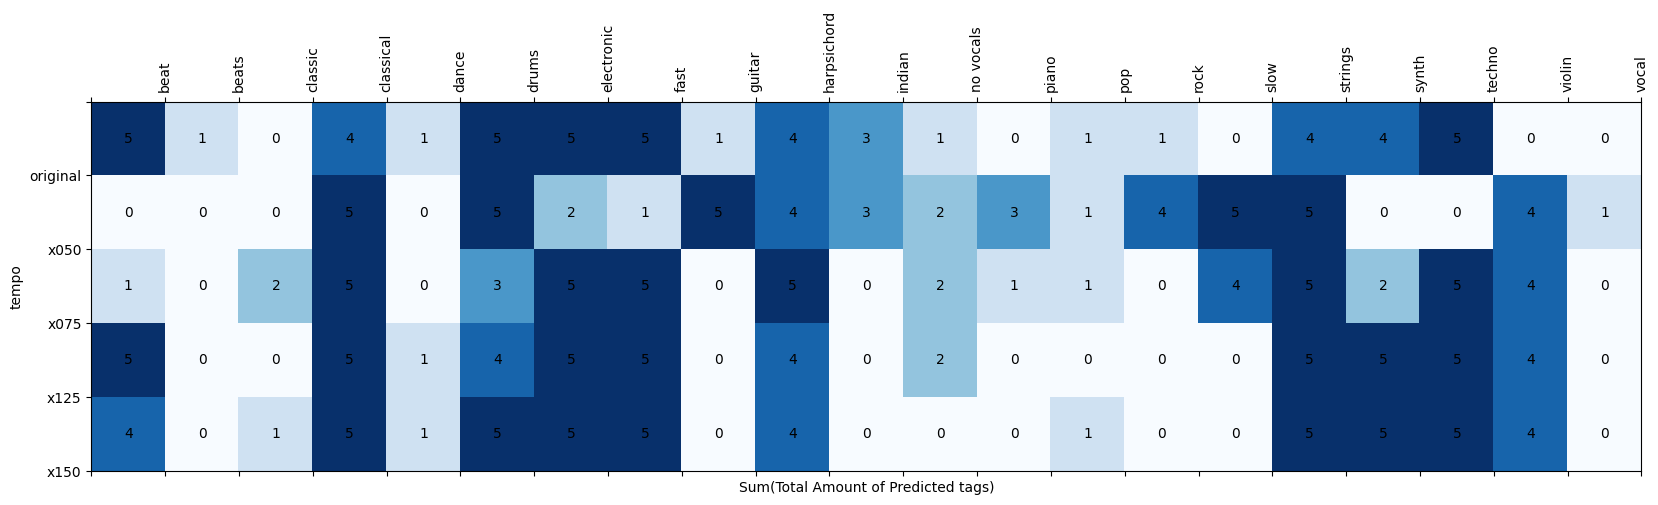

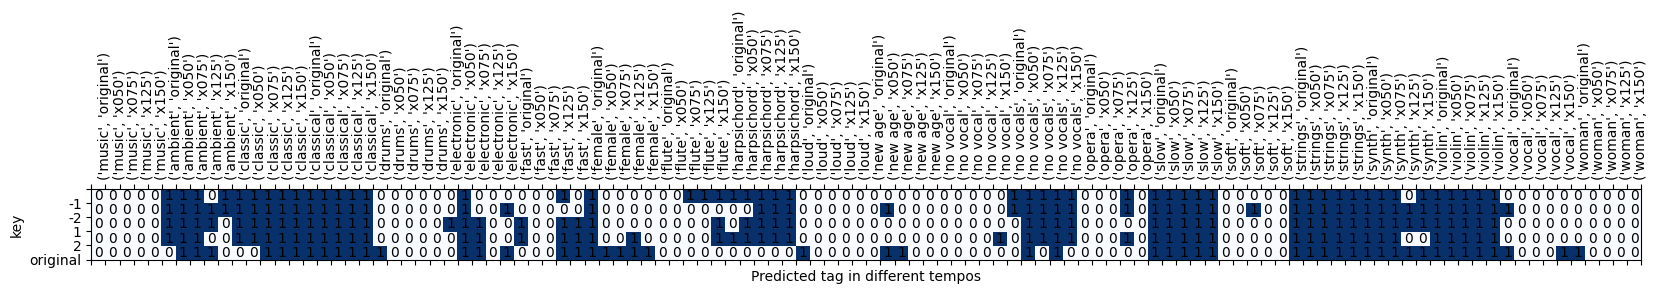

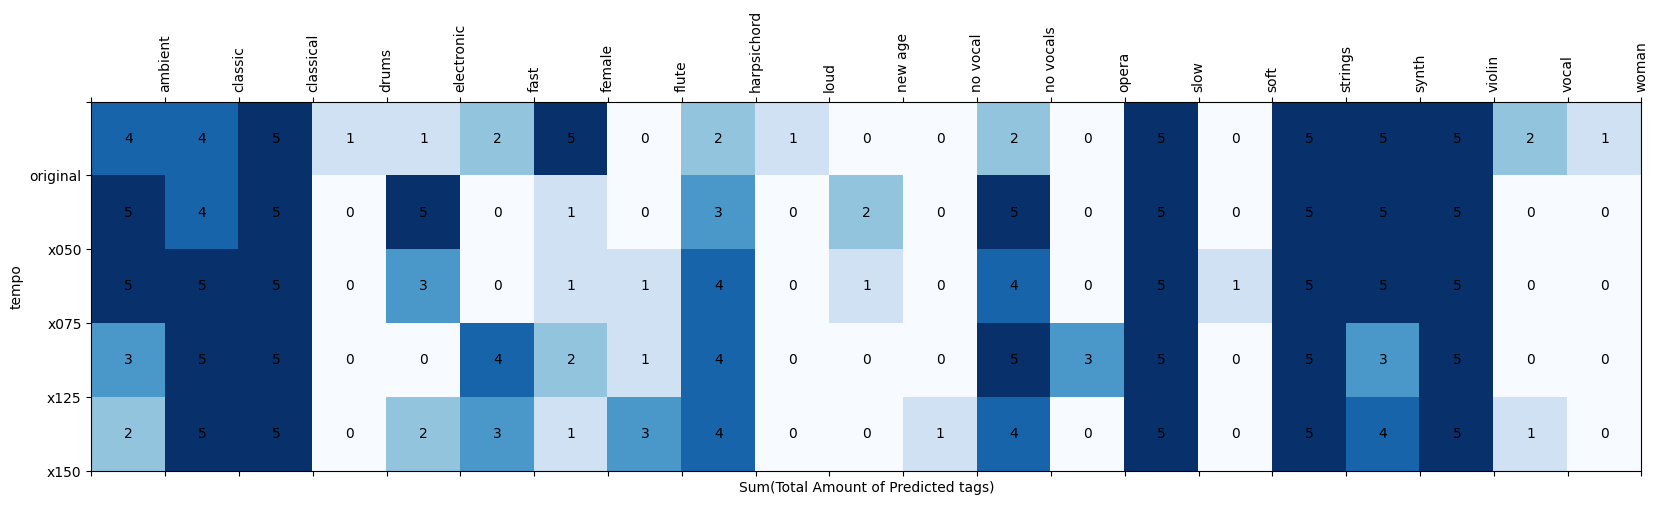

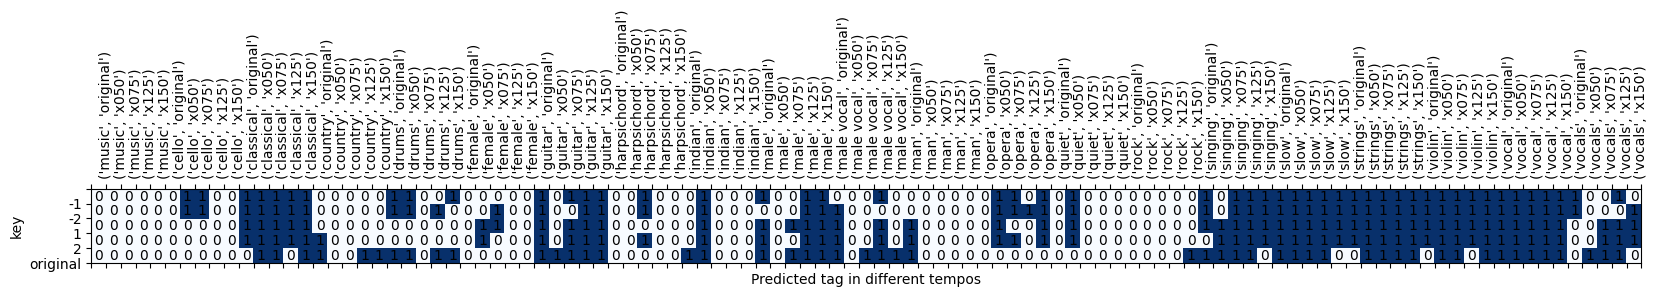

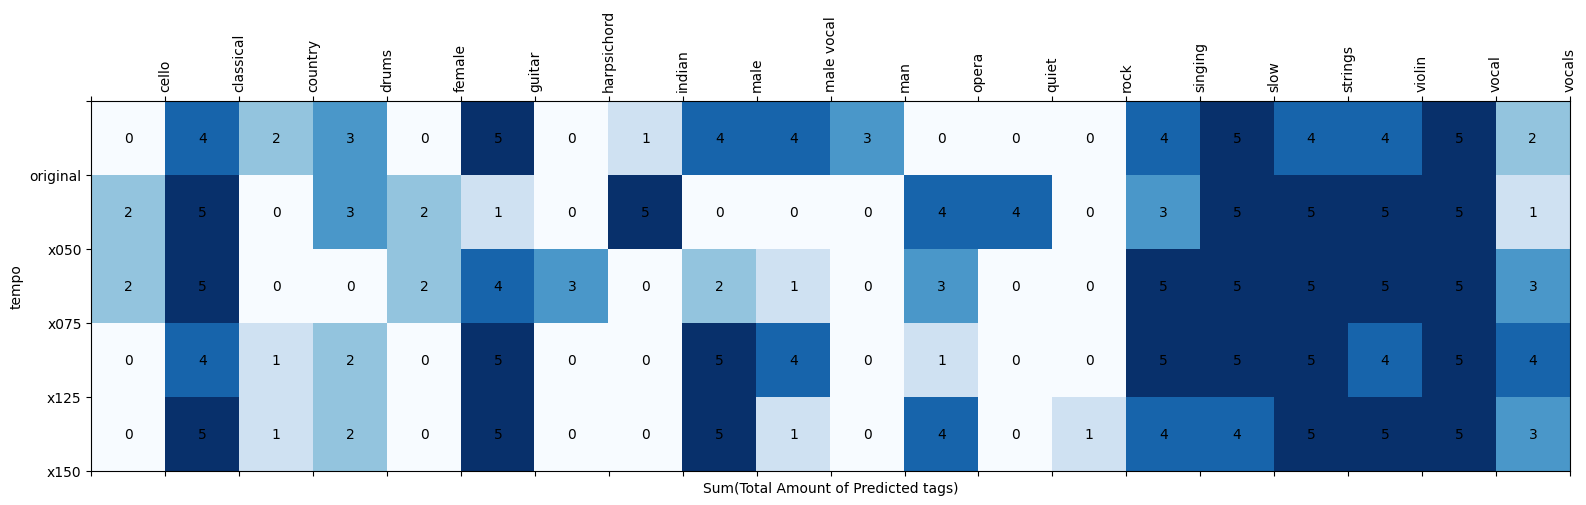

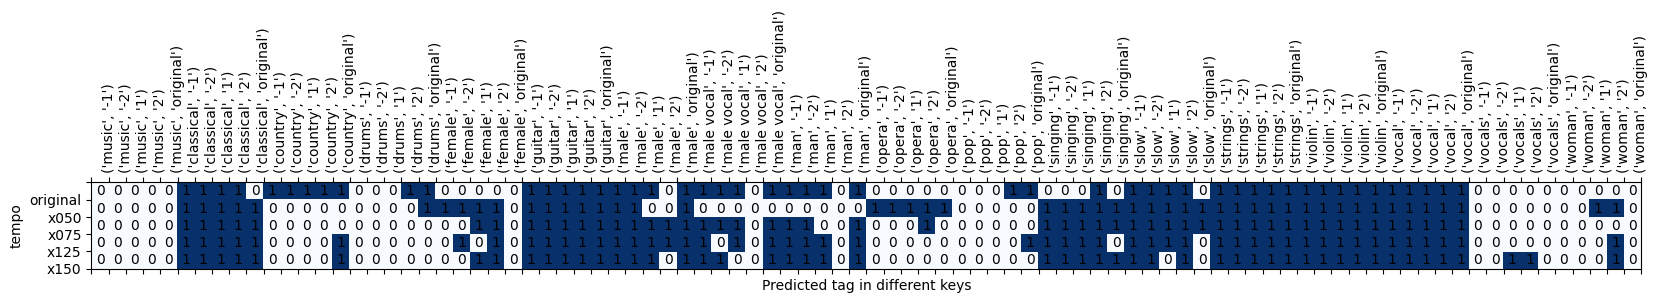

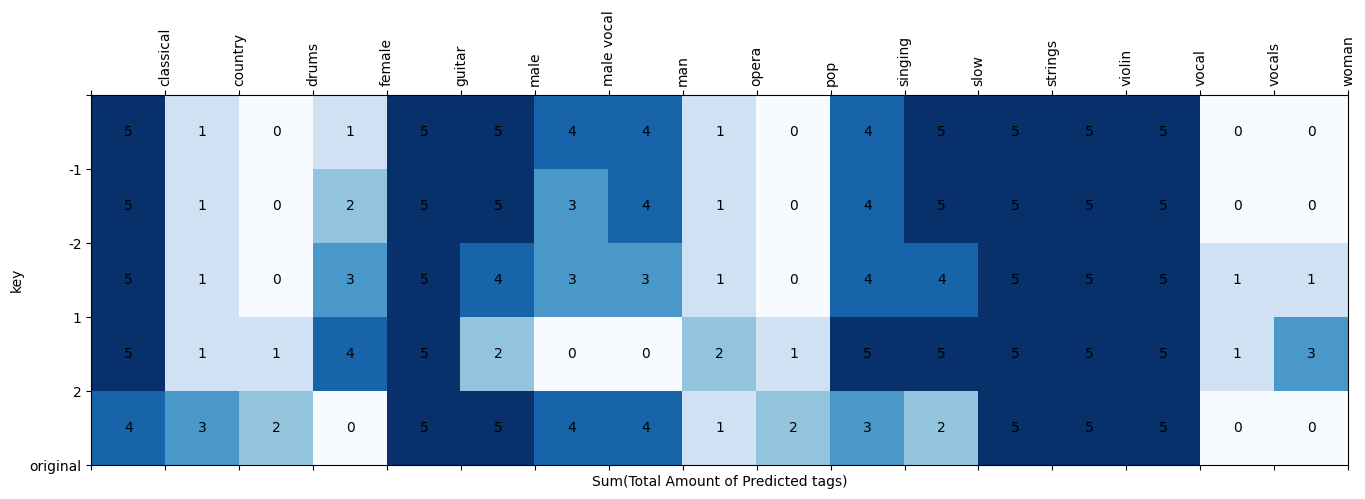

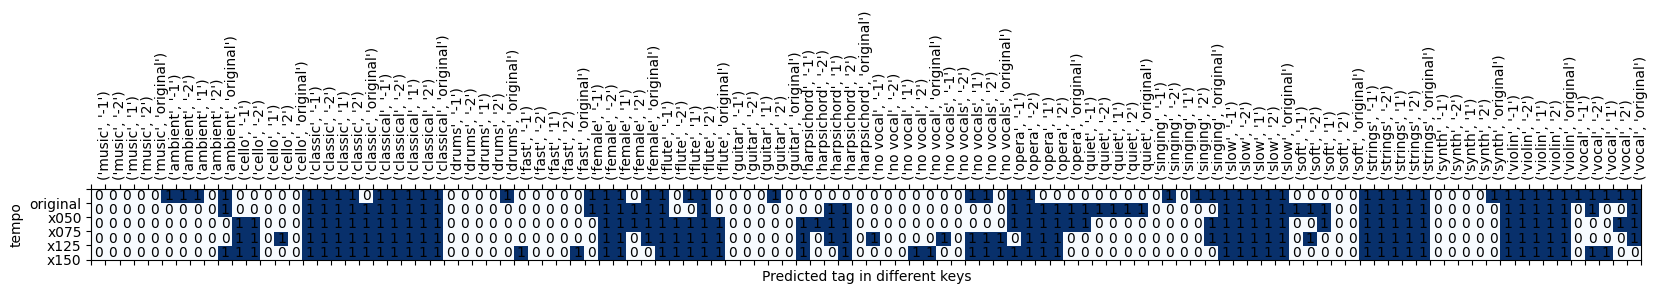

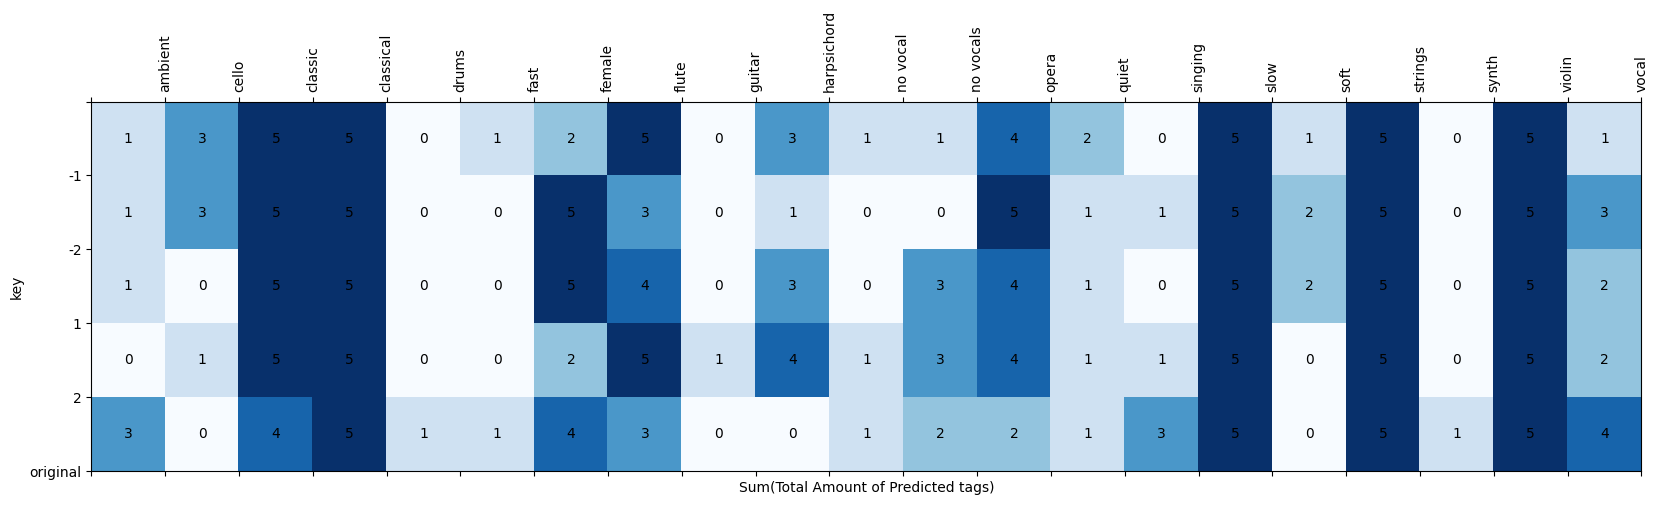

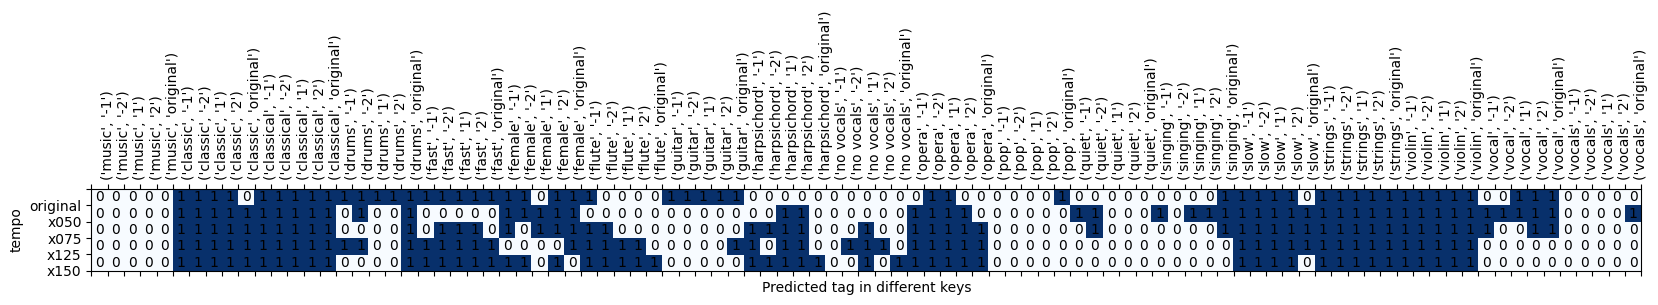

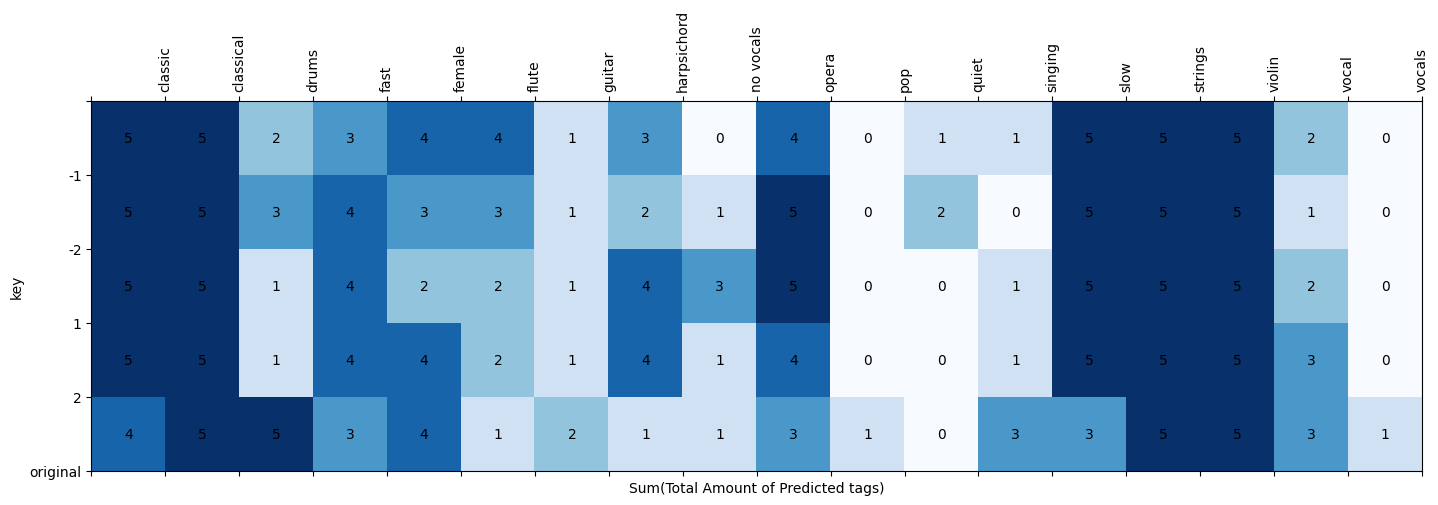

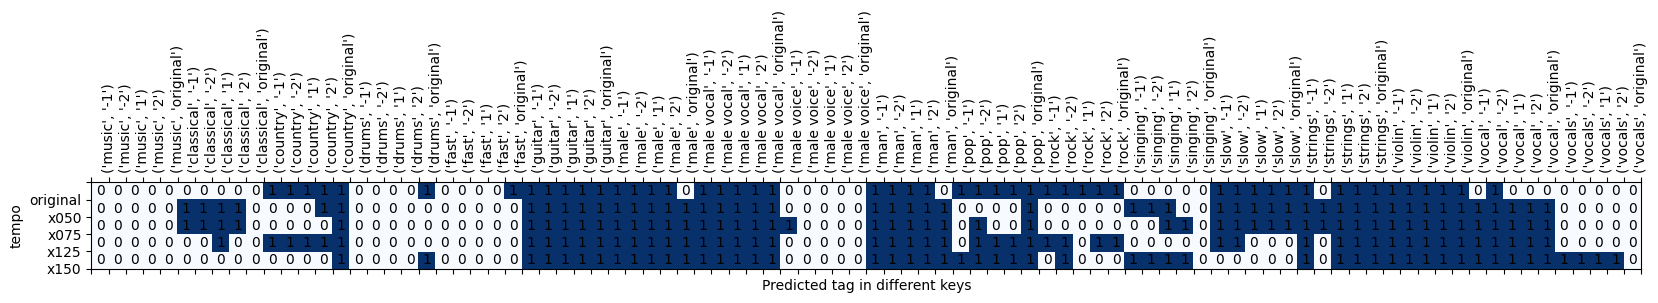

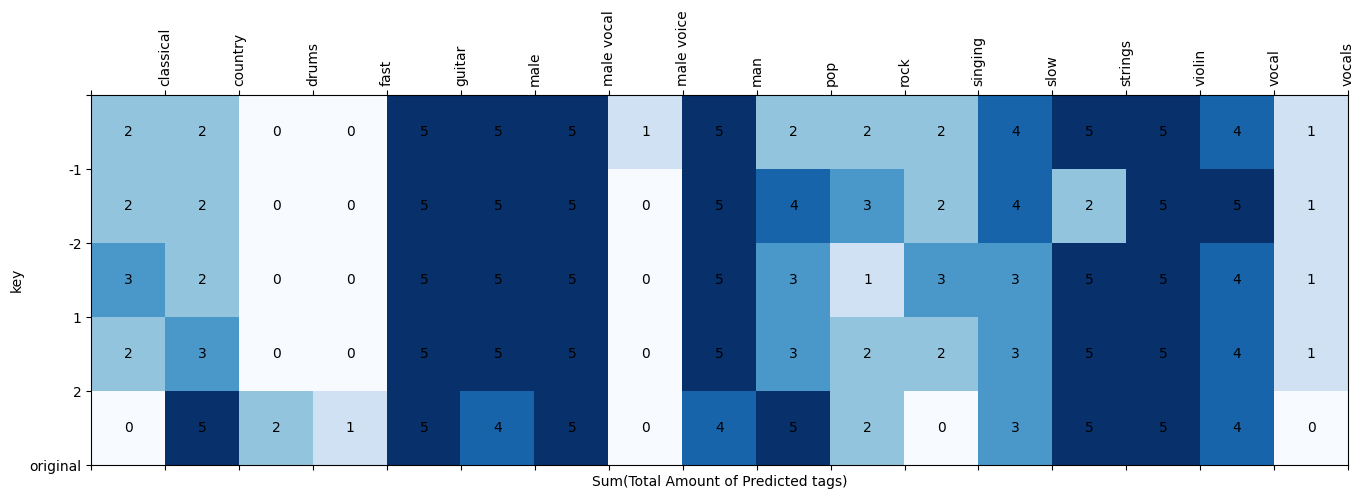

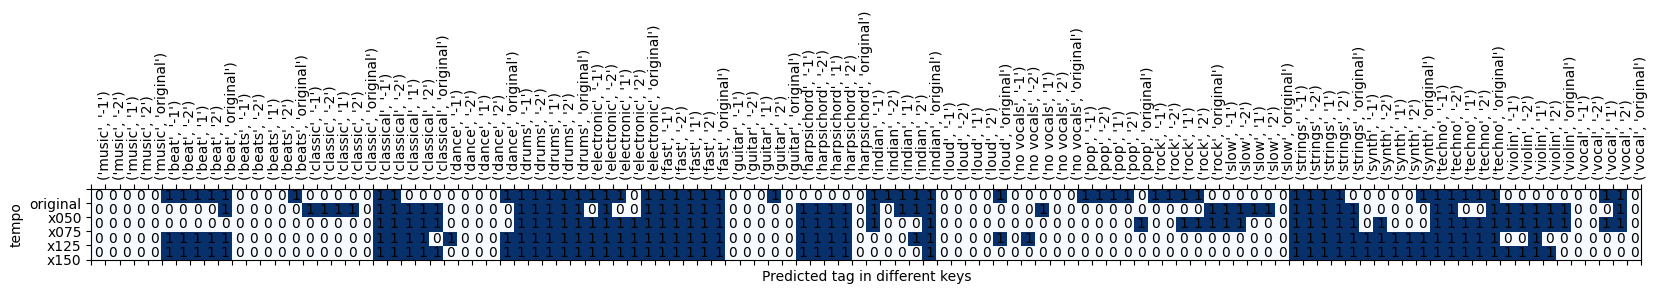

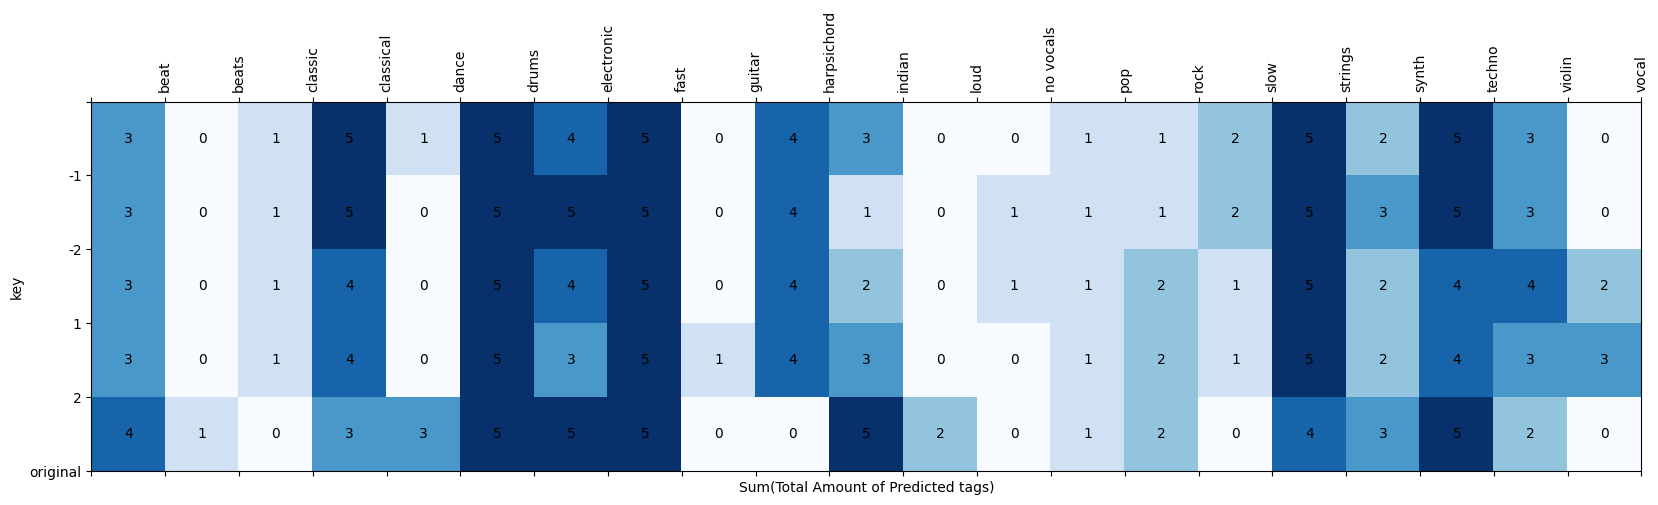

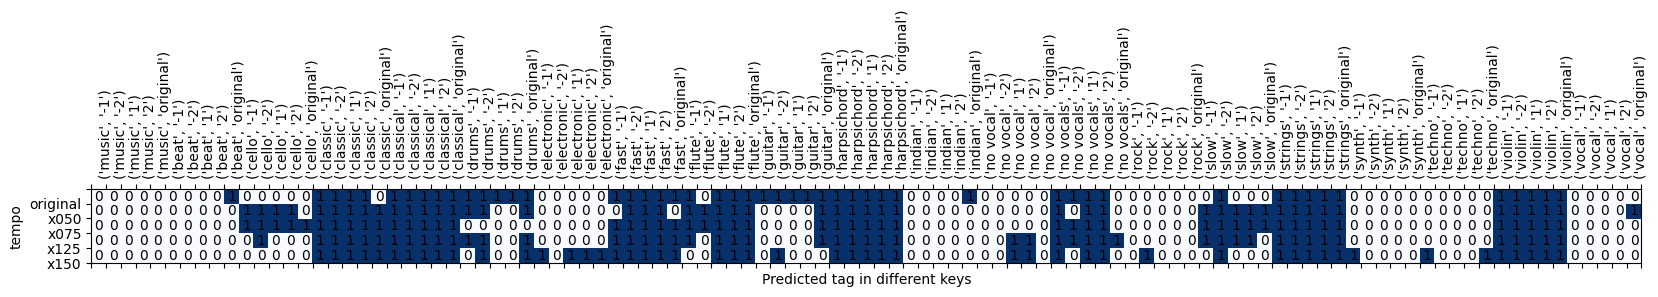

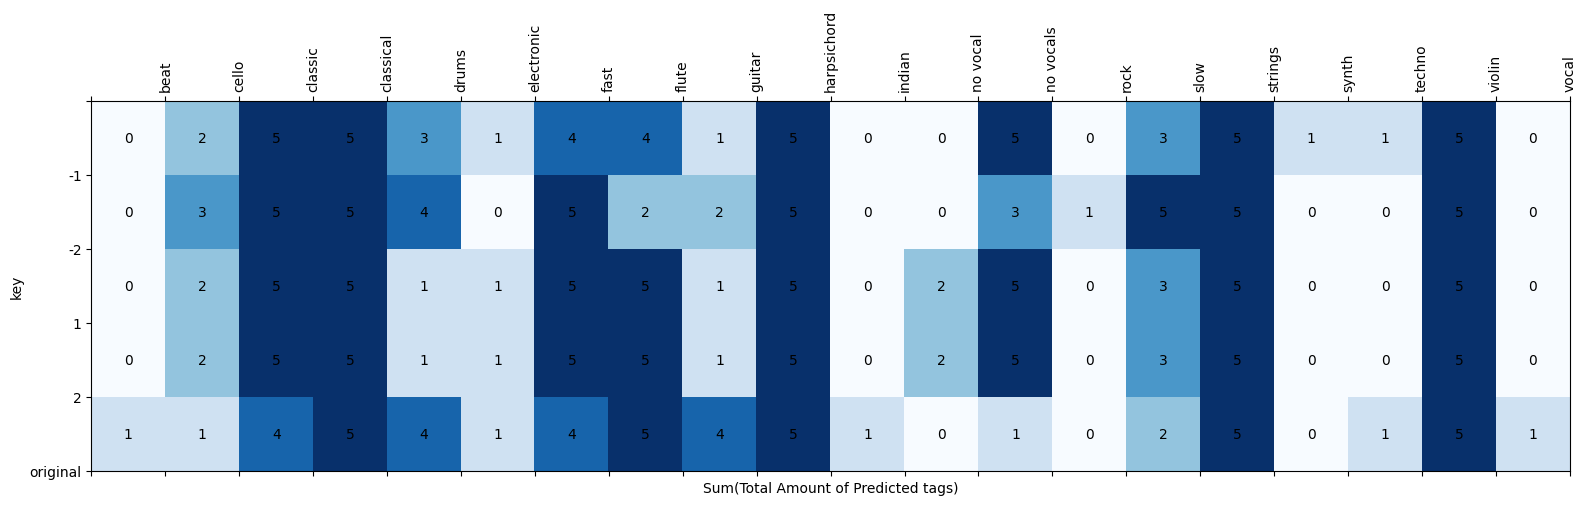

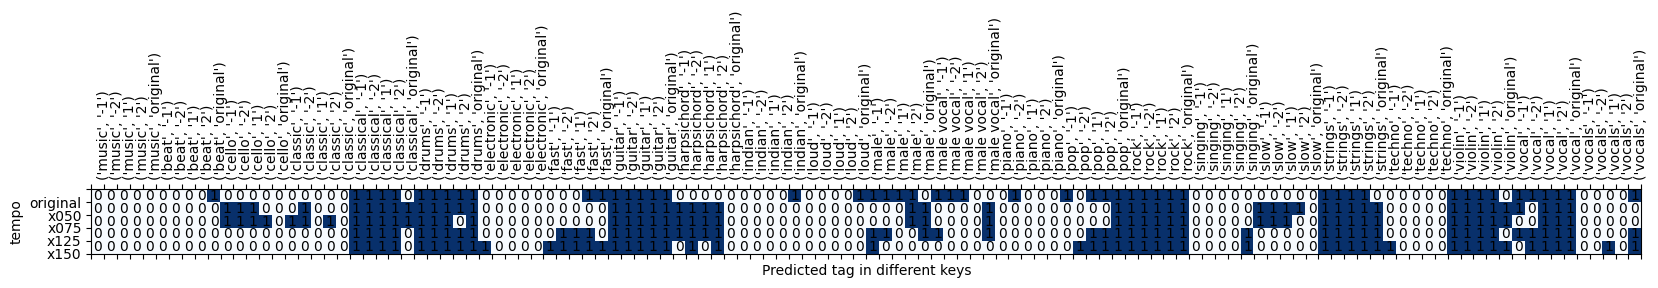

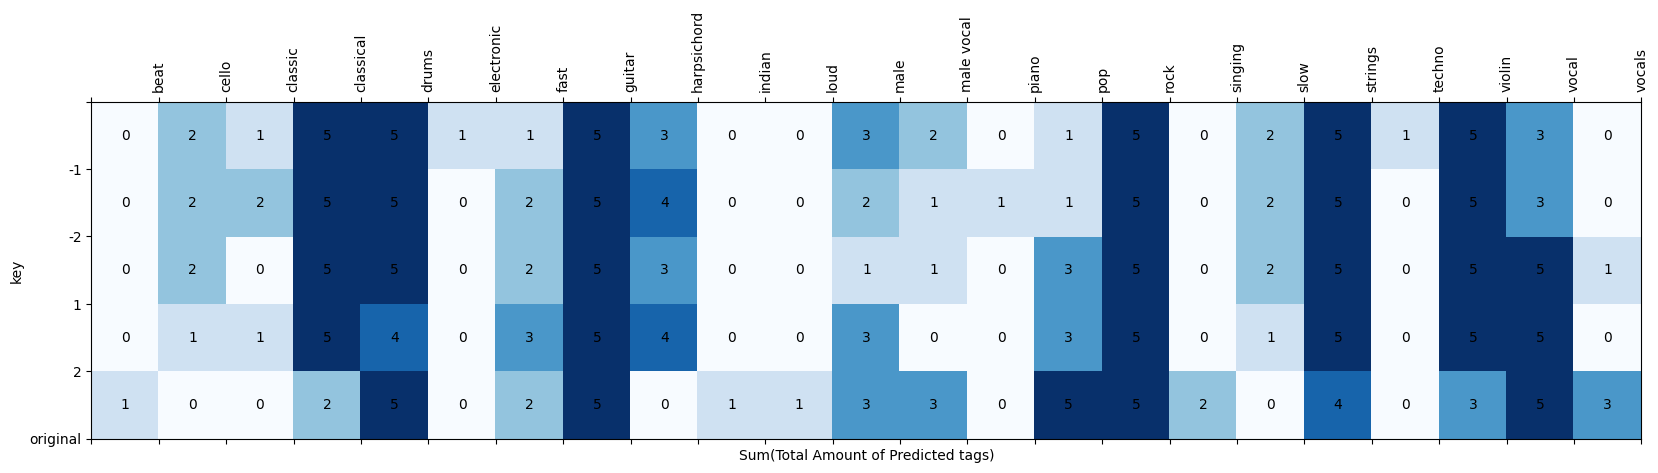

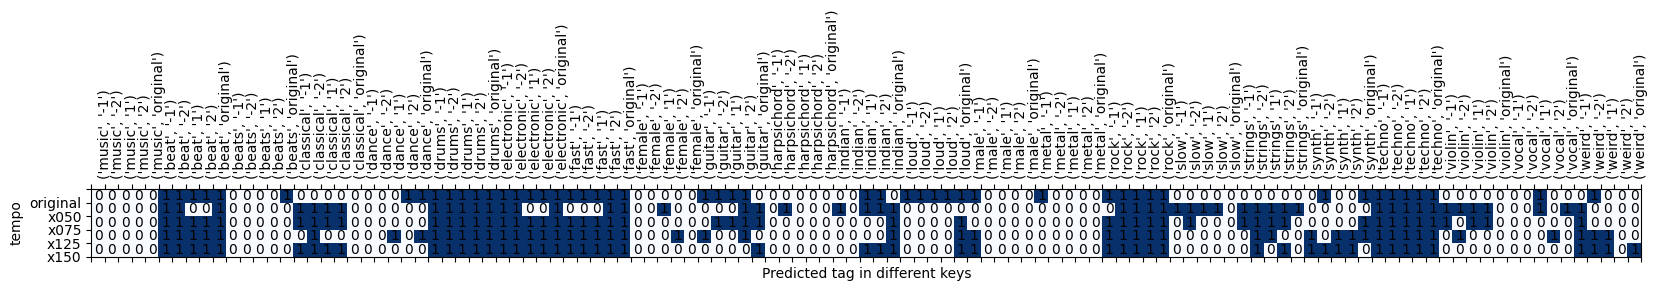

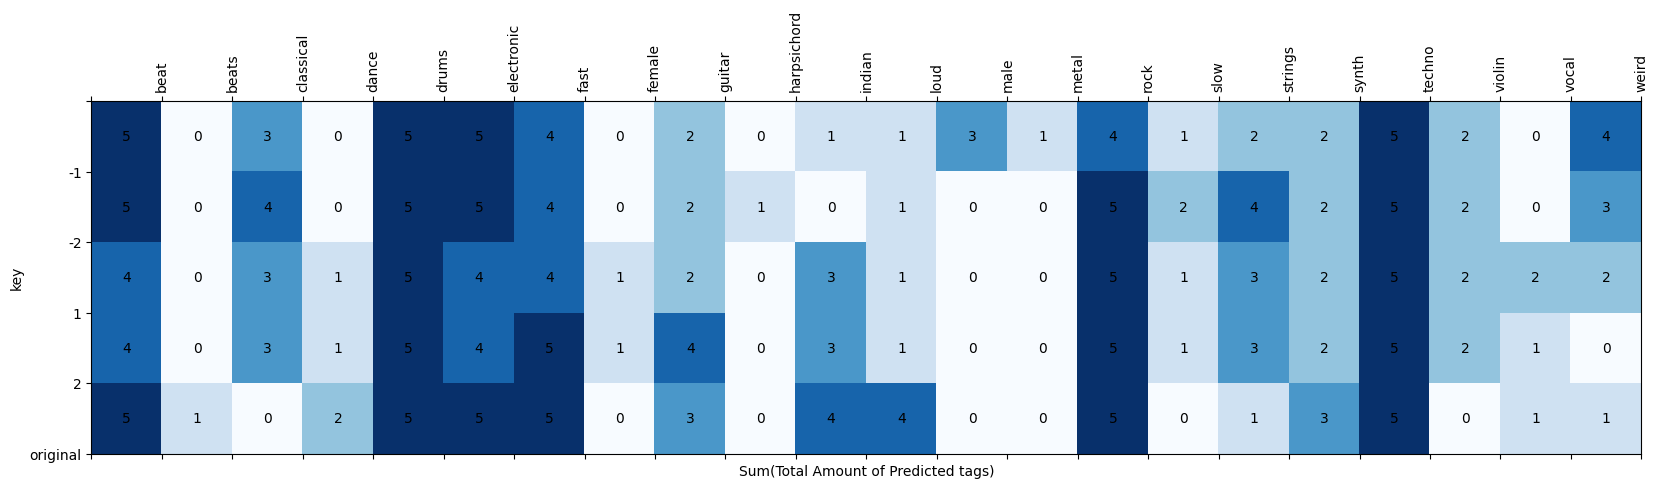

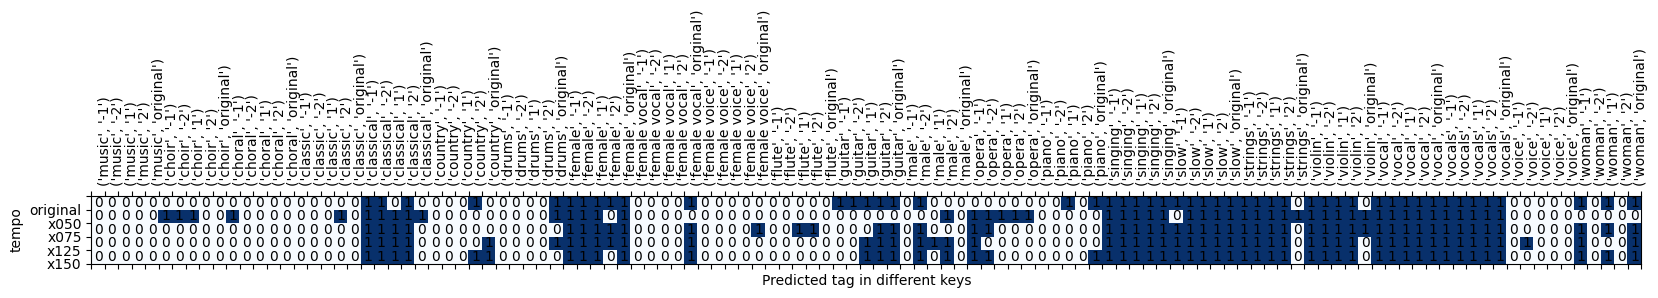

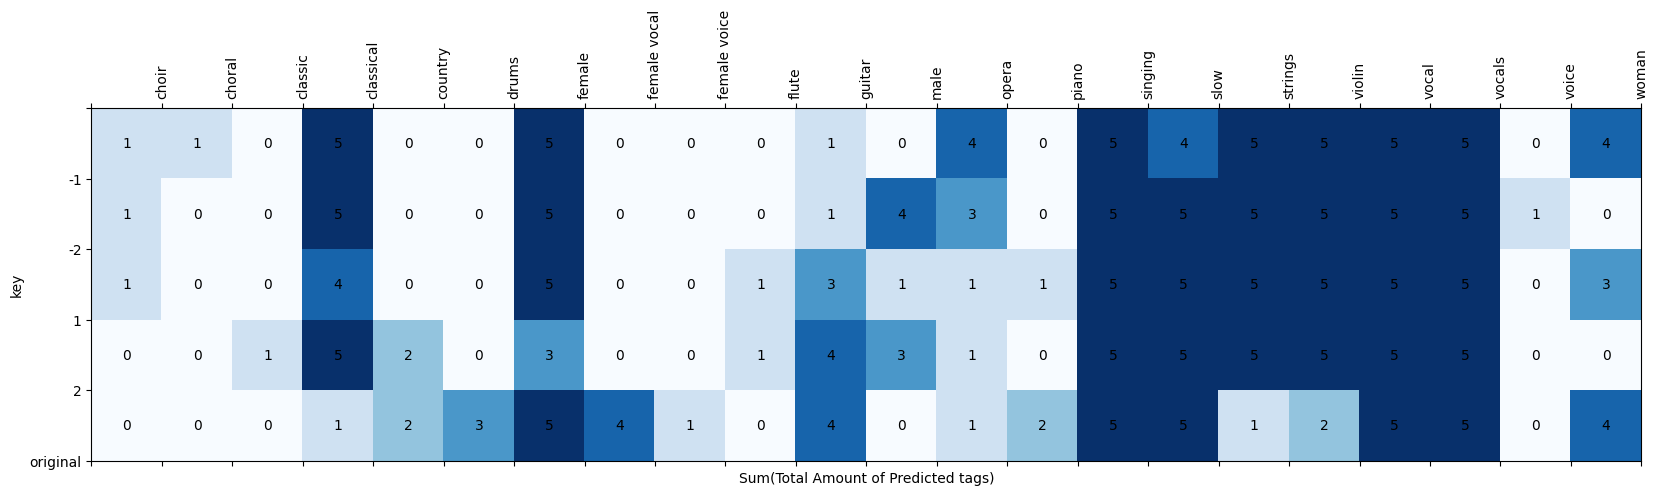

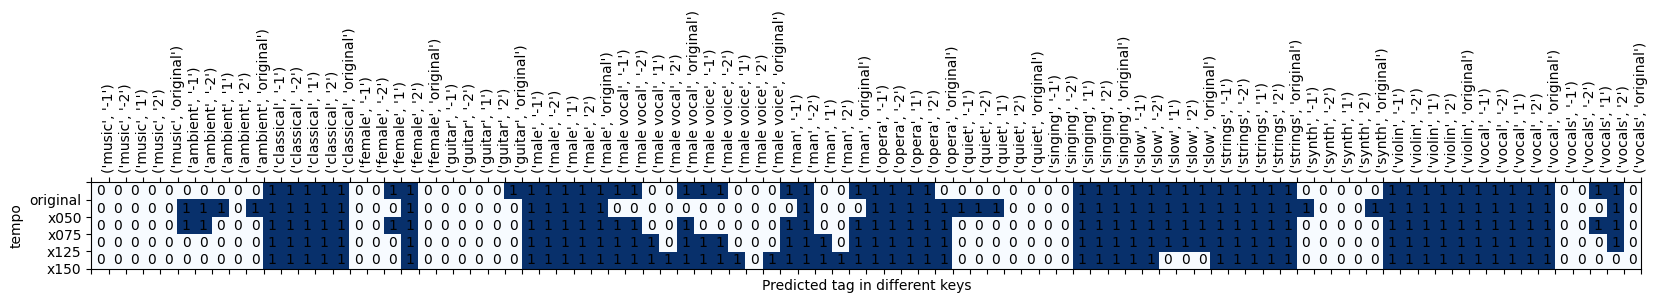

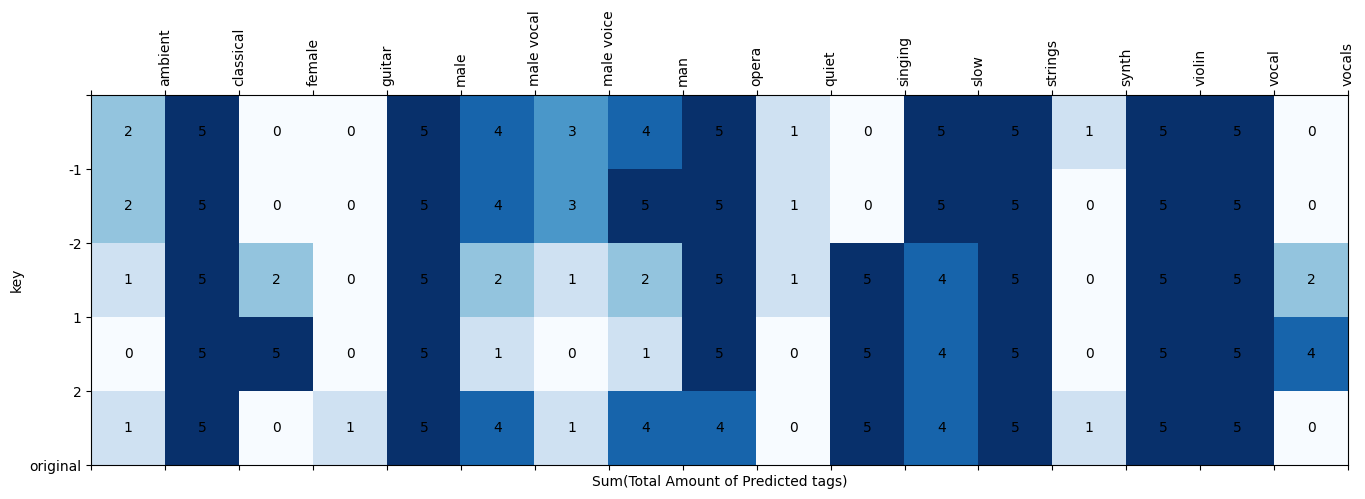

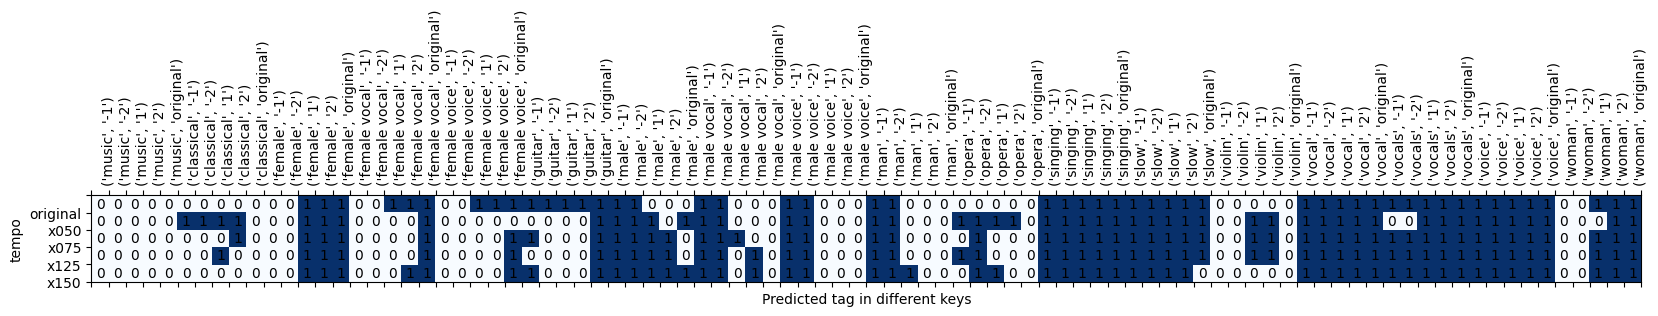

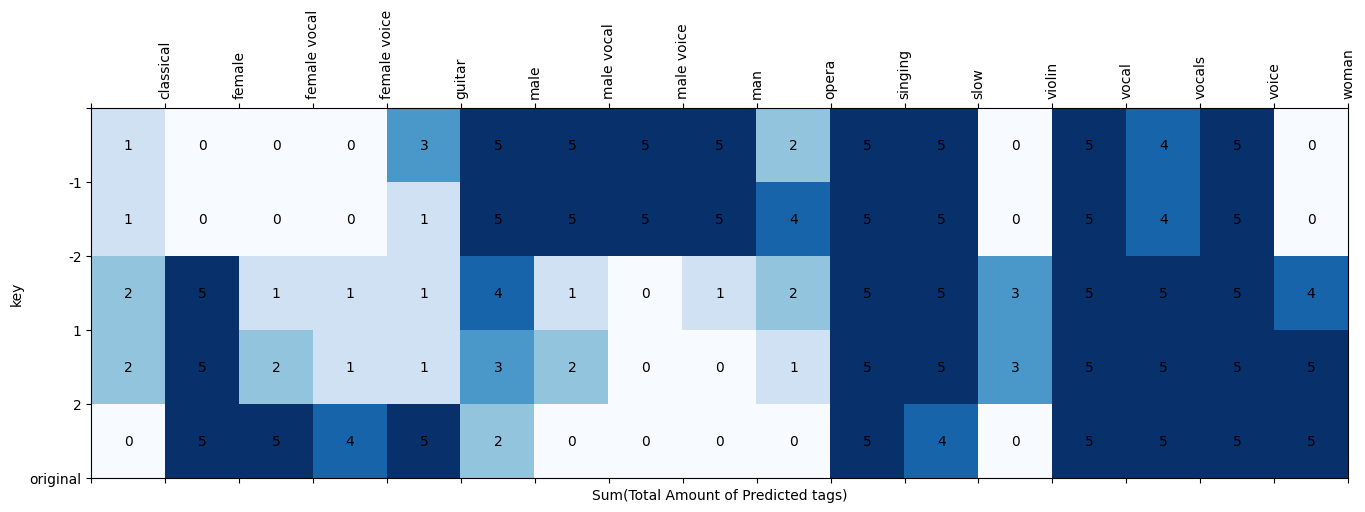

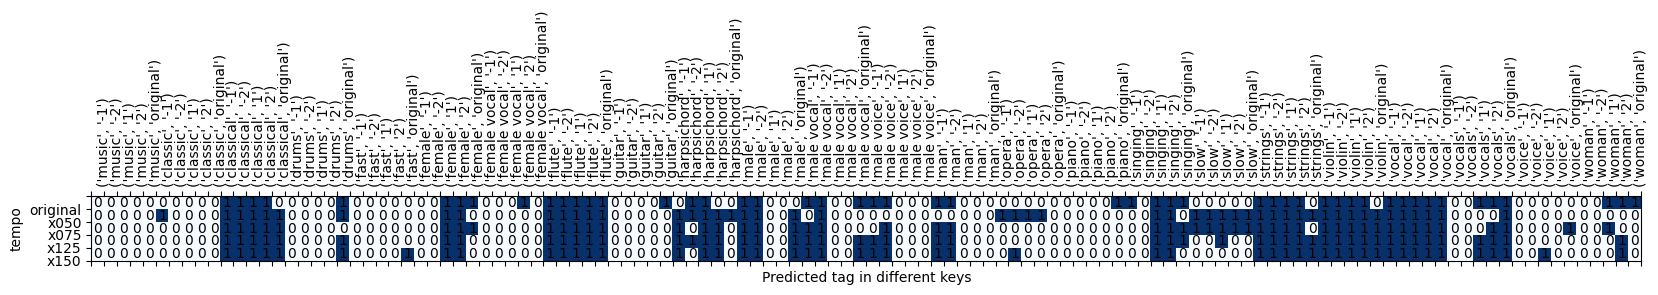

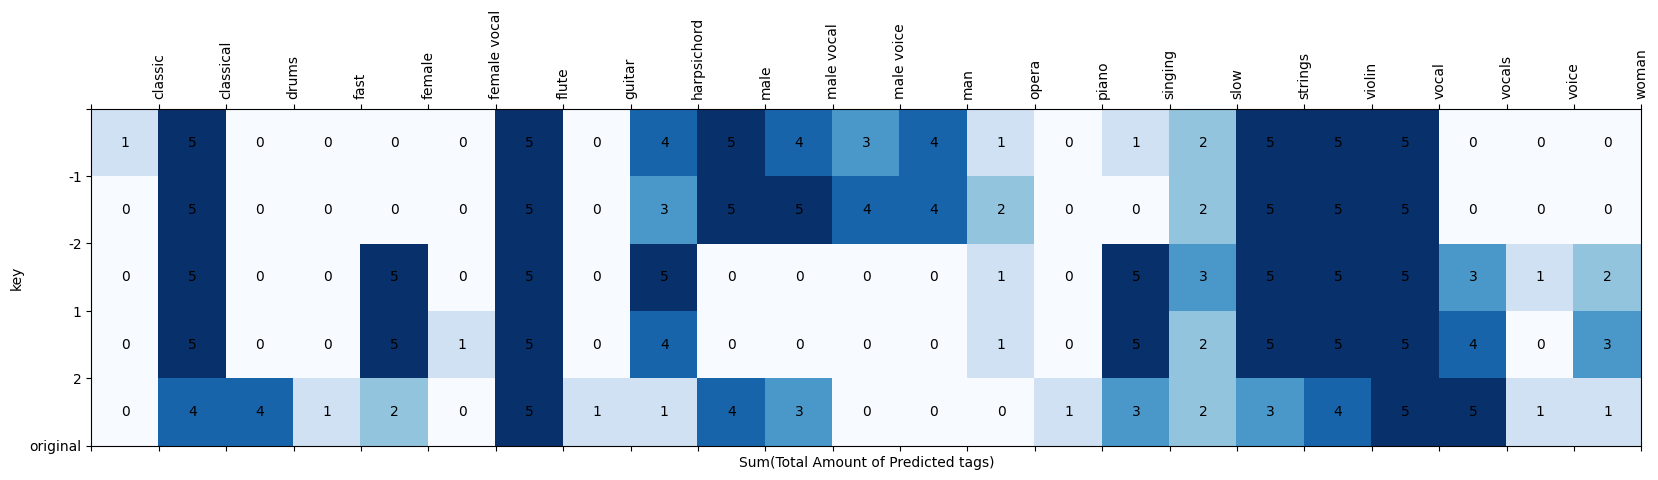

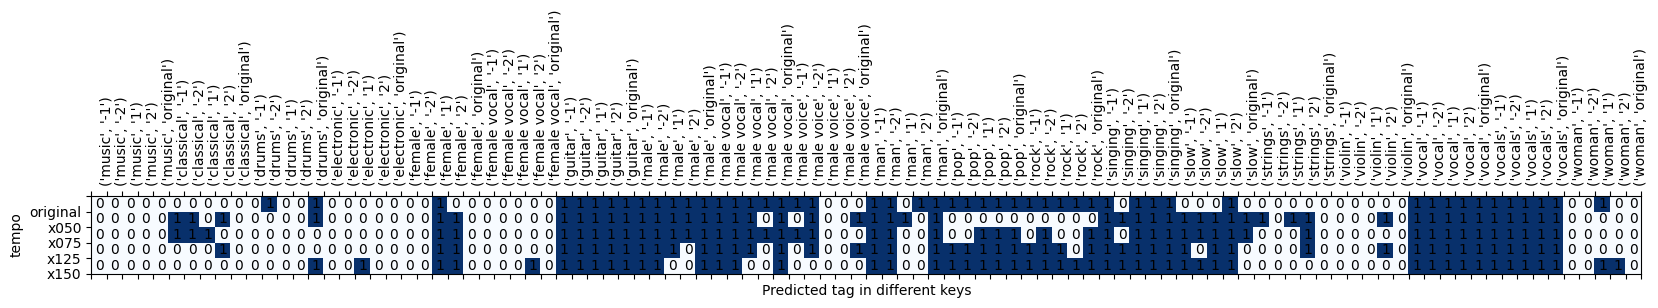

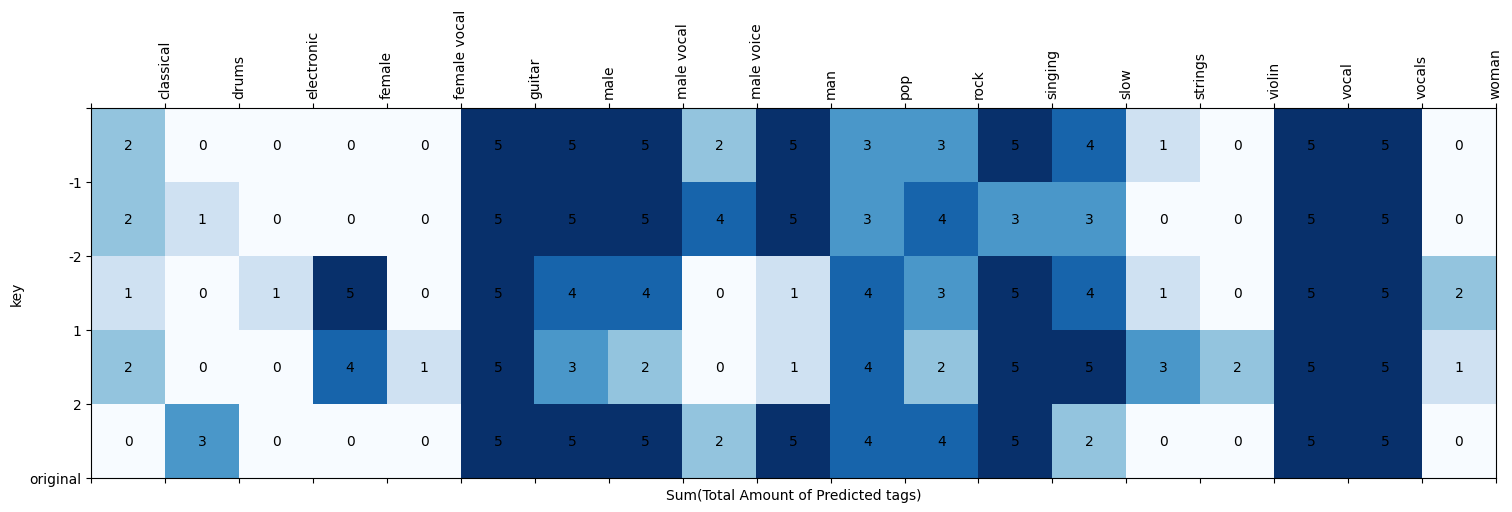

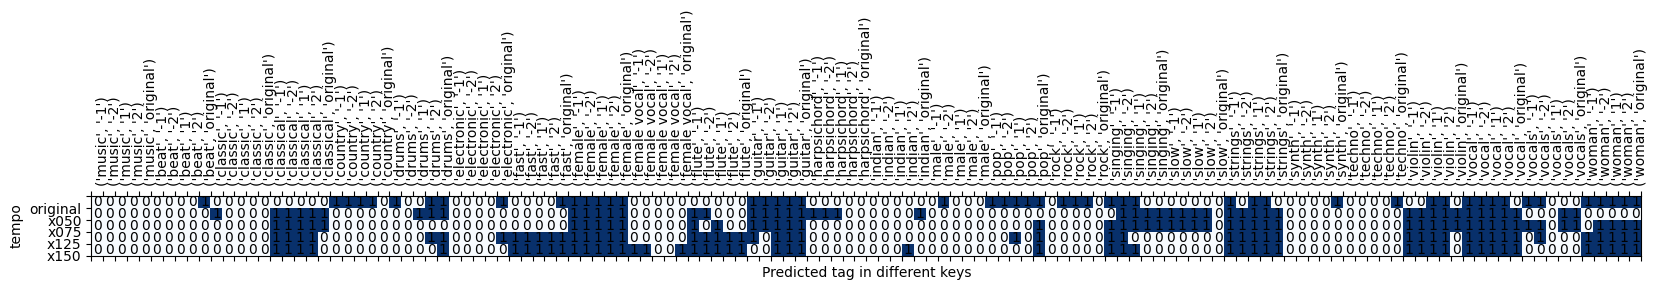

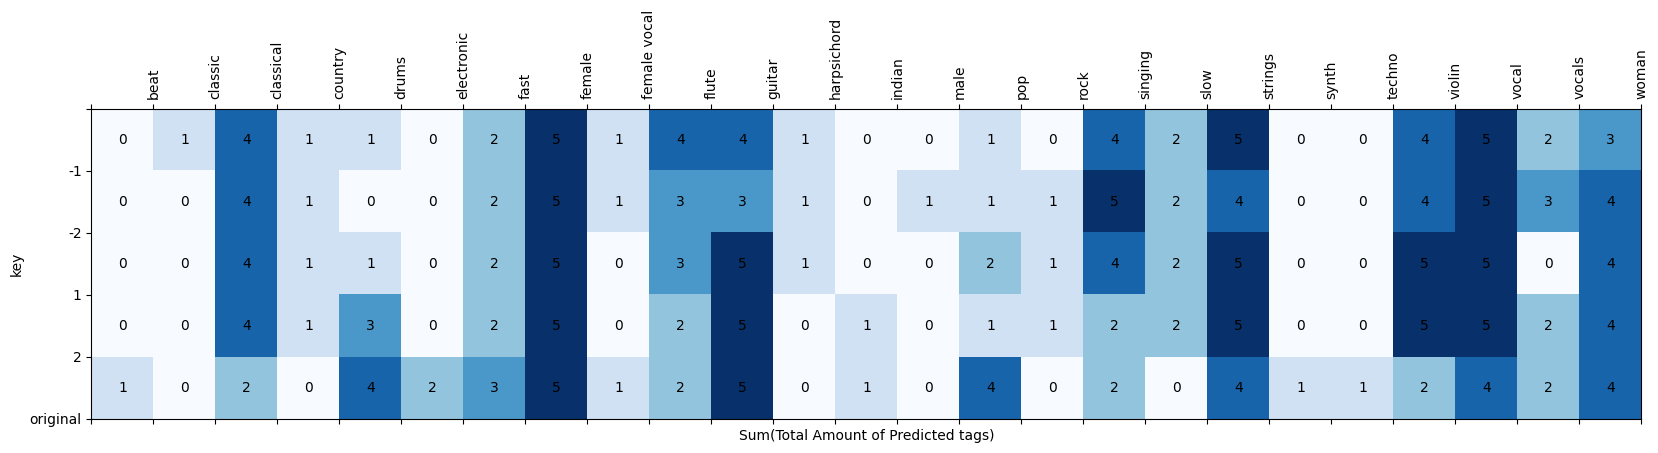

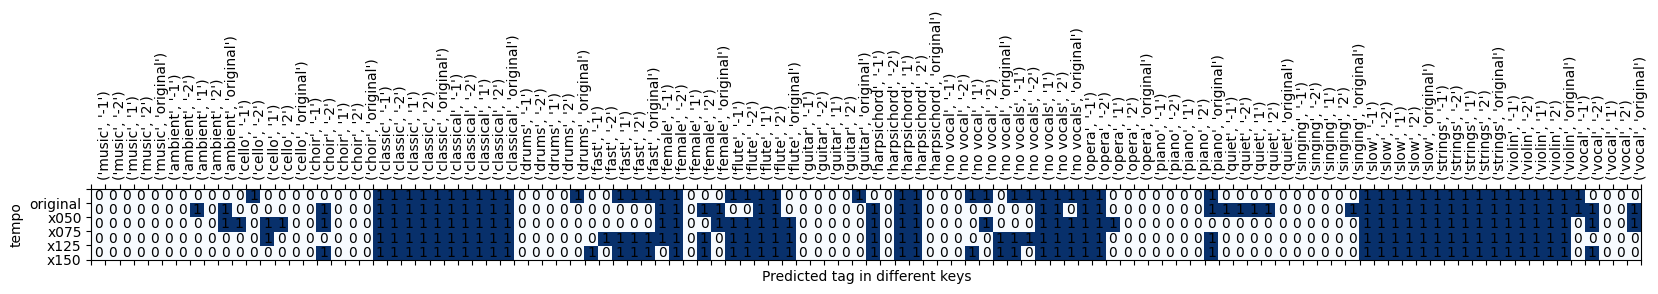

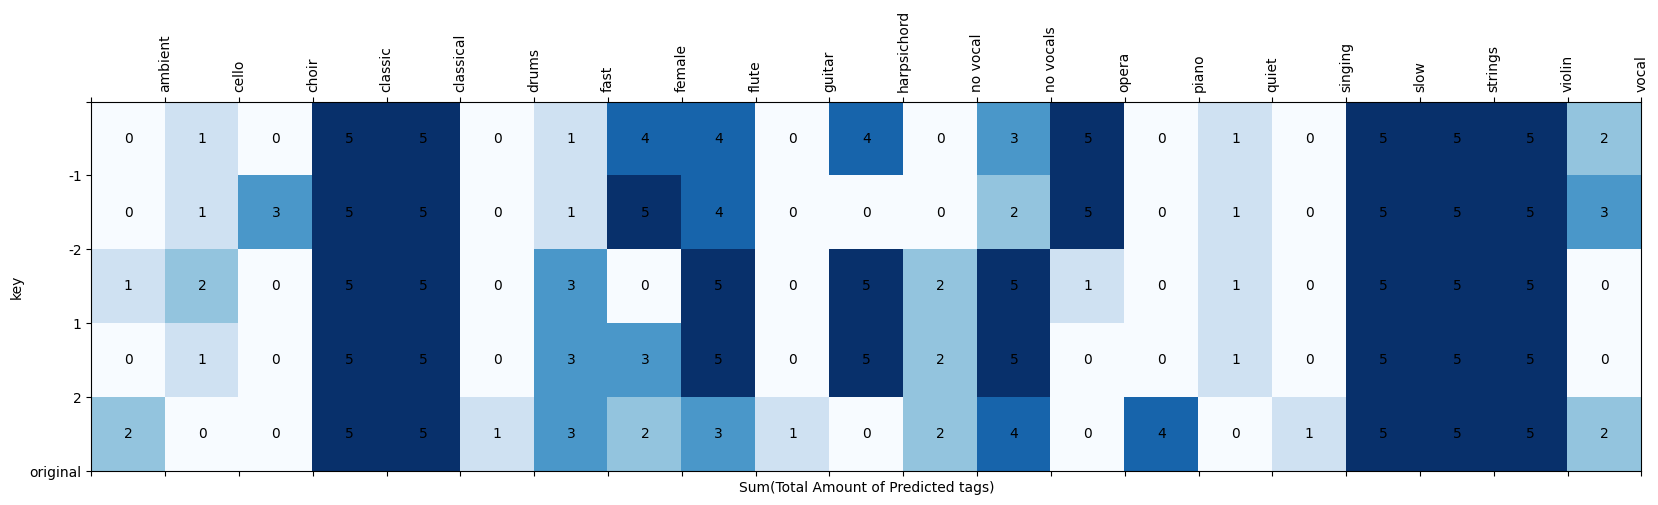

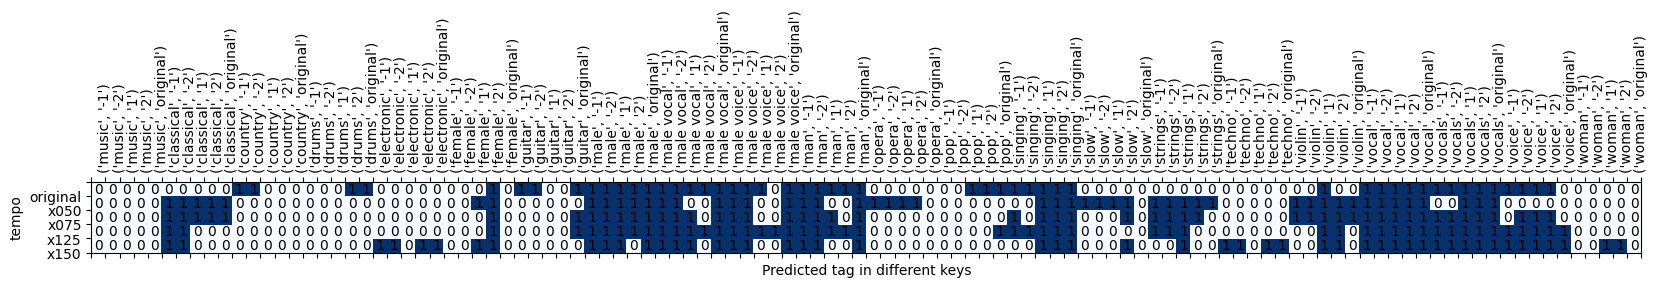

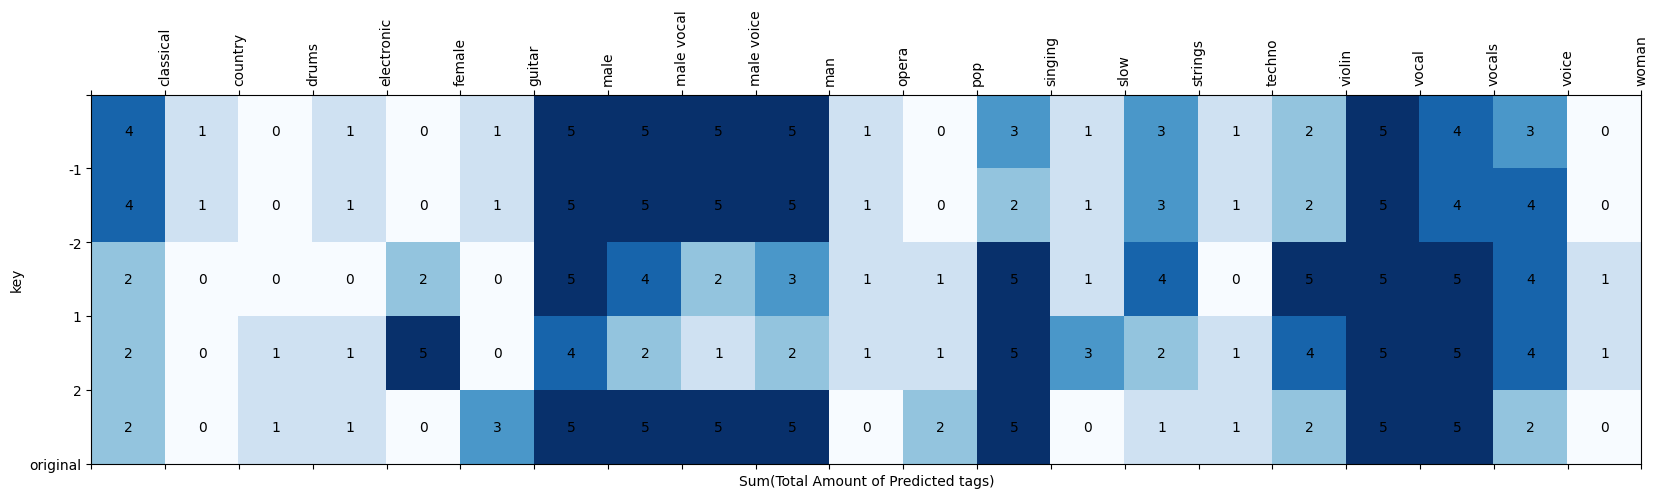

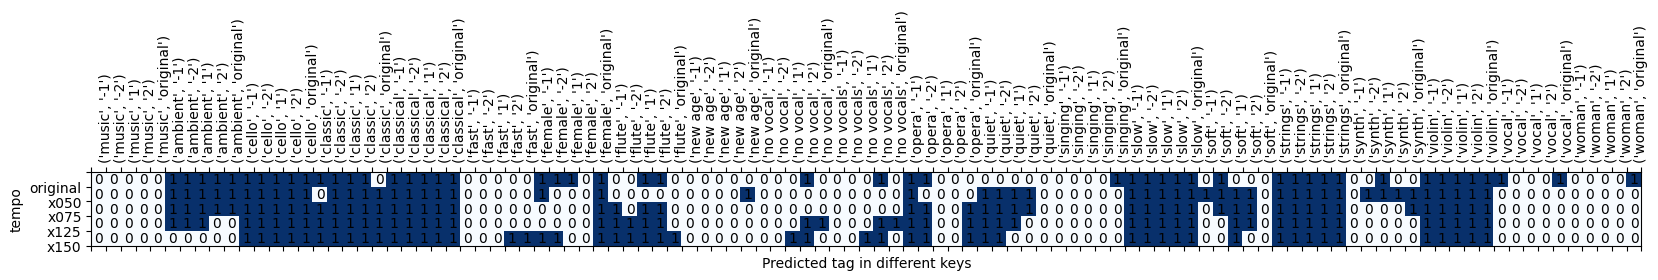

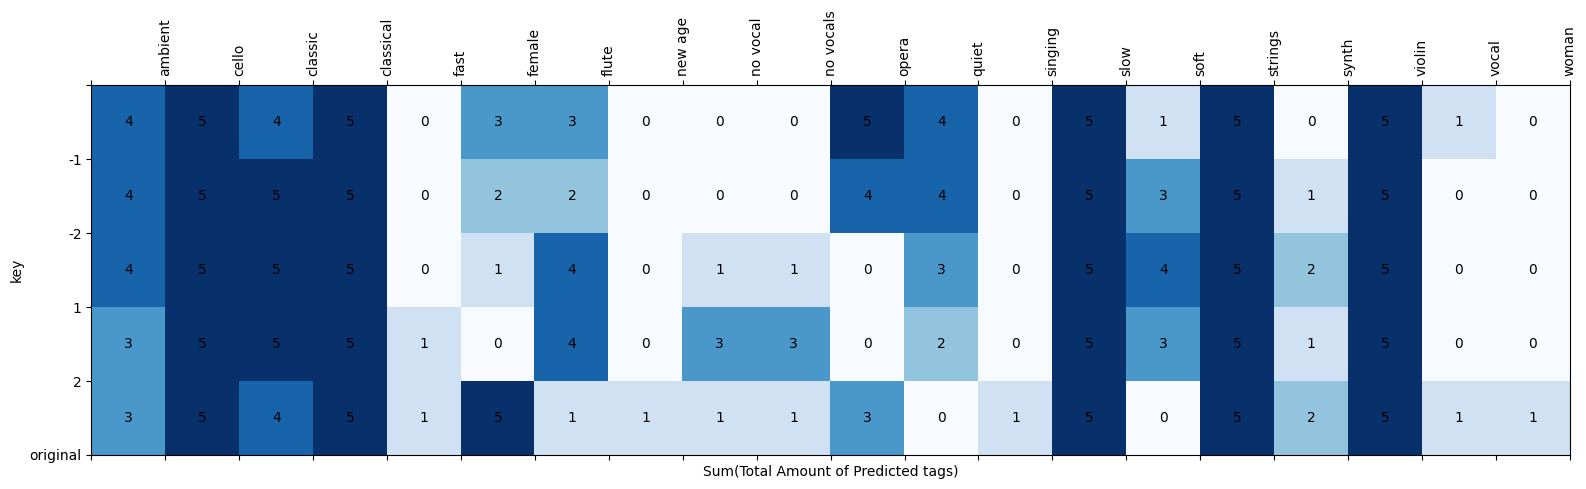

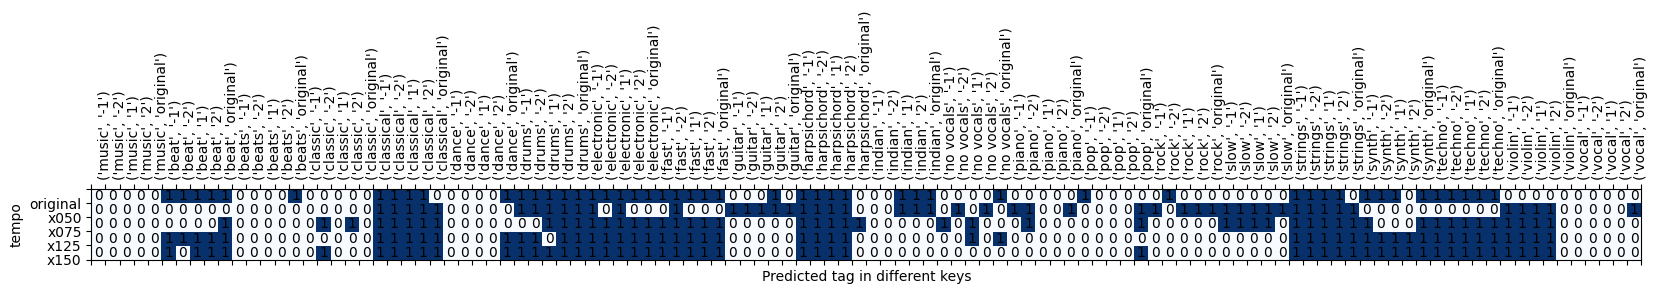

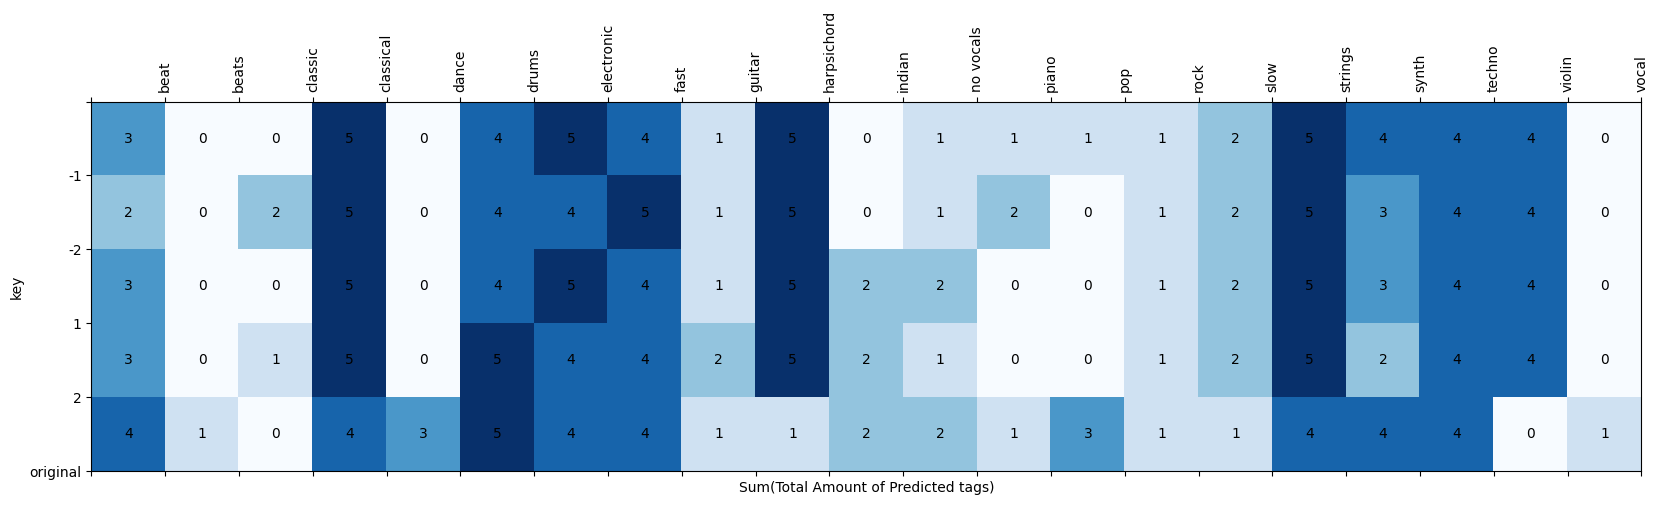

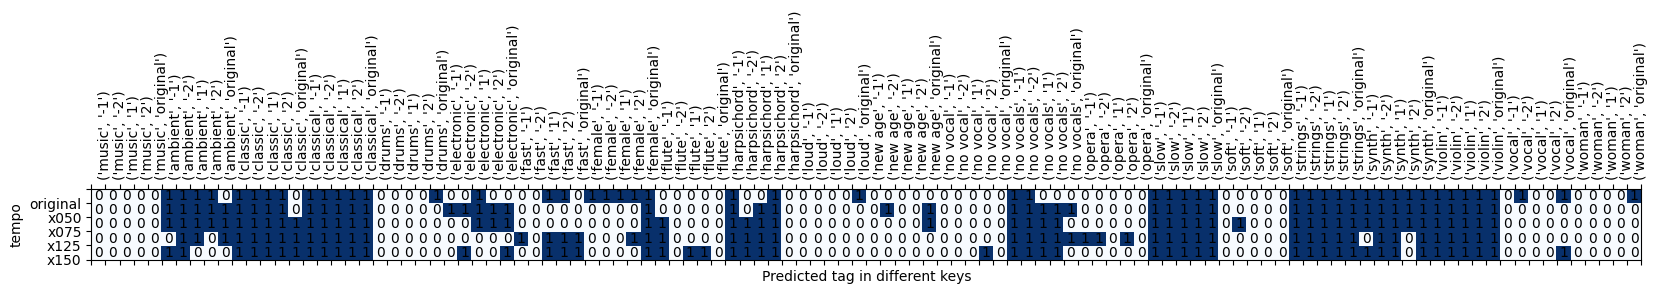

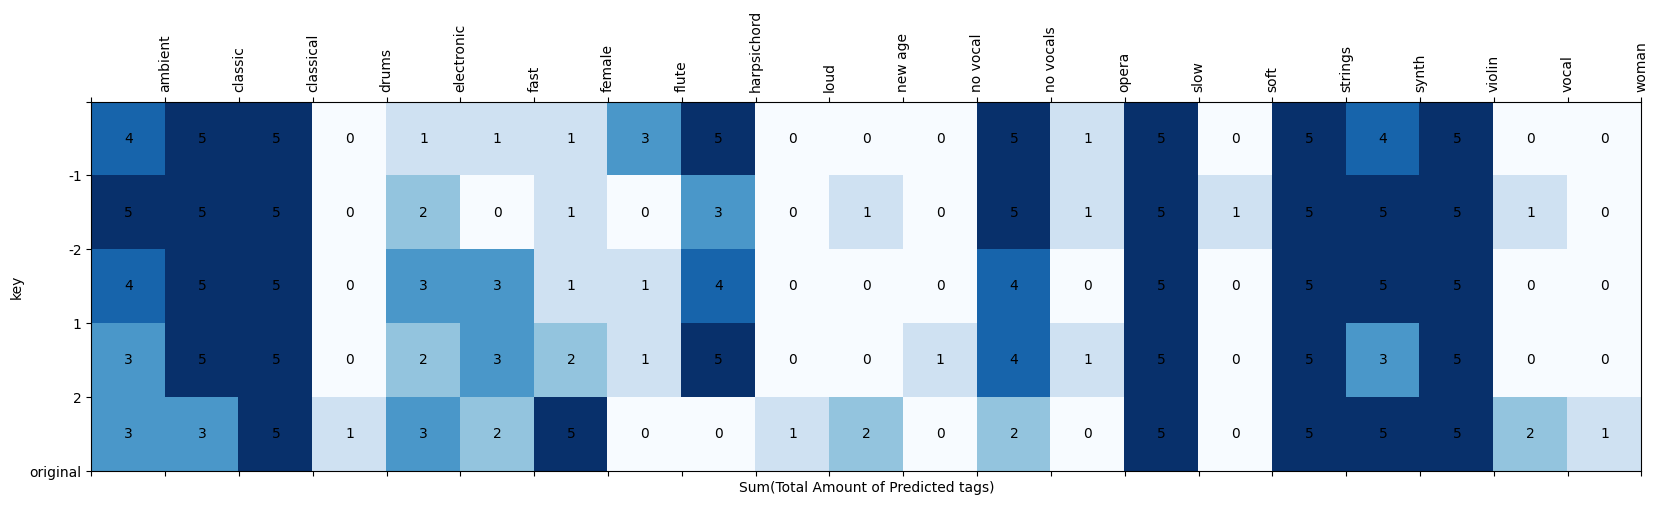

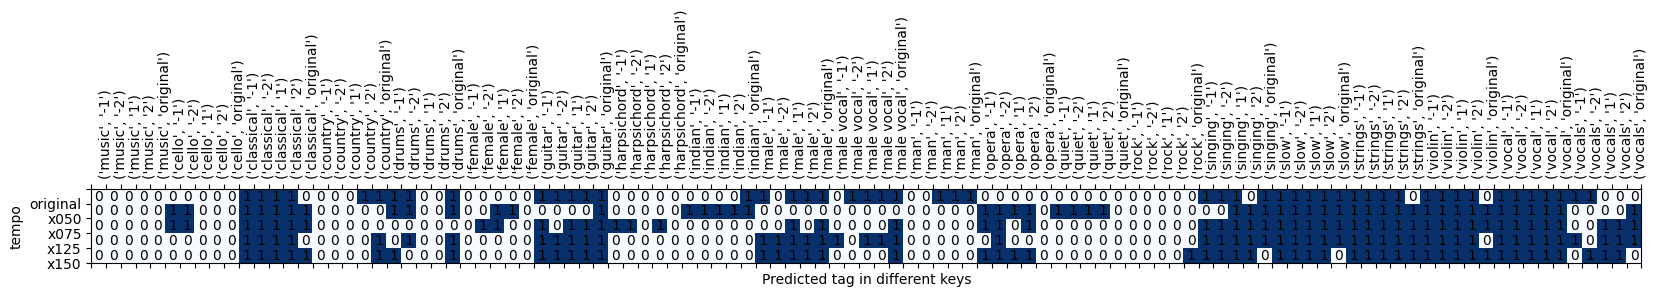

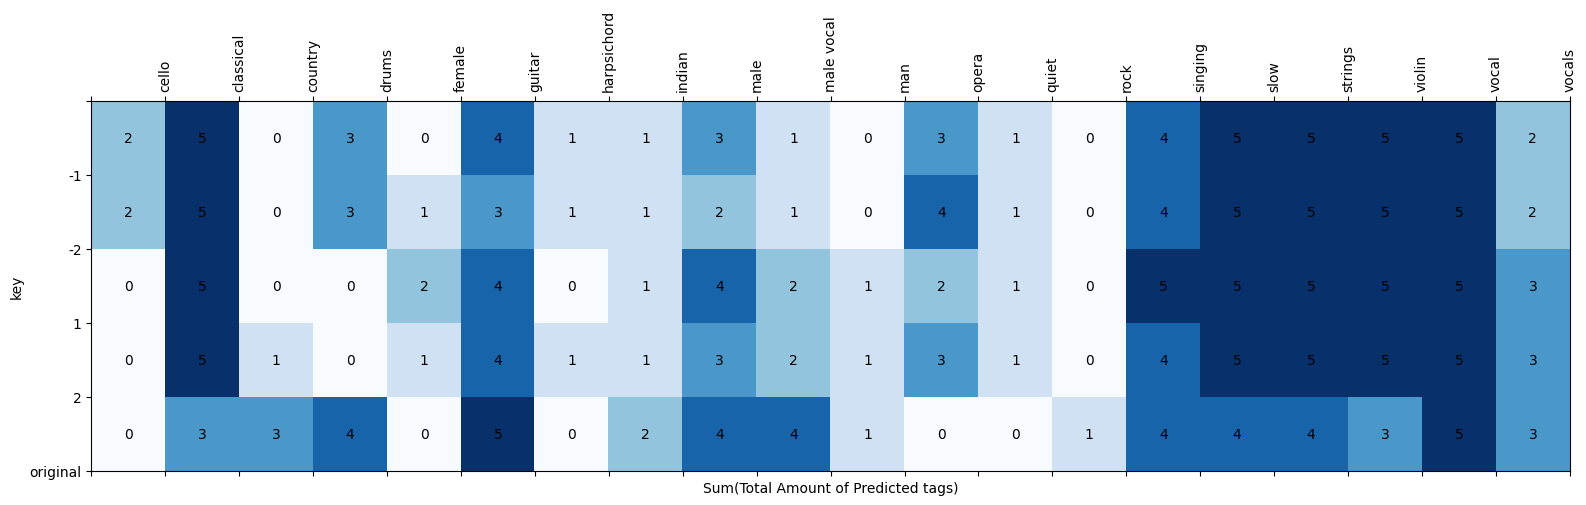

In [4]:
xai_music.tag_analysis()